In [2]:
#Importing necessary libraries 
import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os 
import glob
import tifffile as tif
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tempfile import TemporaryFile
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1


Using TensorFlow backend.


In [3]:
# dataset
dataset = []
paths = []
labels = []
input_size = 64
input_size = 64
num_channel = 13
# getting paths of stored images 
def read_files(path):
    for dirpath, dirnames, filenames in os.walk(path):
    #print('Current path: ', dirpath)
    #print('Directories: ', dirnames)
    #print('Files: ', filenames)
    #print(dirpath)
       #os.chdir(dirpath)
       paths.append(dirpath)
       
# path to 13 band satellite images     
read_files('/home/sachin_sharma/Desktop/exp1_tif_data')
paths.sort()
paths = paths[1:]
file_names = []

In [4]:
print(paths)

['/home/sachin_sharma/Desktop/exp1_tif_data/AnnualCrop', '/home/sachin_sharma/Desktop/exp1_tif_data/Buildup', '/home/sachin_sharma/Desktop/exp1_tif_data/Forest', '/home/sachin_sharma/Desktop/exp1_tif_data/HerbaceousVegetation', '/home/sachin_sharma/Desktop/exp1_tif_data/Highway', '/home/sachin_sharma/Desktop/exp1_tif_data/Pasture', '/home/sachin_sharma/Desktop/exp1_tif_data/PermanentCrop', '/home/sachin_sharma/Desktop/exp1_tif_data/River', '/home/sachin_sharma/Desktop/exp1_tif_data/SeaLake']


In [5]:
# Converting 13 channel images to np array
def img_array(paths):
    print('{}'.format(paths))
    os.chdir('{}'.format(paths))
    for file in glob.glob("*.tif"):
            print('name of file: '+ file)
            file_names.append(file)
            x = tif.imread('{}'.format(file))
            basename, ext = os.path.splitext(file)
            labels.append(basename)
            x = np.resize(x, (64, 64, 13))
            dataset.append(x)

#calling
for pths in paths:
    img_array(pths)

/home/sachin_sharma/Desktop/exp1_tif_data/AnnualCrop
name of file: AnnualCrop_2729.tif
name of file: AnnualCrop_1341.tif
name of file: AnnualCrop_1443.tif
name of file: AnnualCrop_1252.tif
name of file: AnnualCrop_1399.tif
name of file: AnnualCrop_13.tif
name of file: AnnualCrop_60.tif
name of file: AnnualCrop_528.tif
name of file: AnnualCrop_1059.tif
name of file: AnnualCrop_2220.tif
name of file: AnnualCrop_2370.tif
name of file: AnnualCrop_2199.tif
name of file: AnnualCrop_2698.tif
name of file: AnnualCrop_1698.tif
name of file: AnnualCrop_915.tif
name of file: AnnualCrop_2902.tif
name of file: AnnualCrop_1627.tif
name of file: AnnualCrop_2081.tif
name of file: AnnualCrop_317.tif
name of file: AnnualCrop_131.tif
name of file: AnnualCrop_50.tif
name of file: AnnualCrop_1564.tif
name of file: AnnualCrop_692.tif
name of file: AnnualCrop_890.tif
name of file: AnnualCrop_2089.tif
name of file: AnnualCrop_1115.tif
name of file: AnnualCrop_2397.tif
name of file: AnnualCrop_378.tif
name of 

name of file: AnnualCrop_454.tif
name of file: AnnualCrop_2768.tif
name of file: AnnualCrop_1413.tif
name of file: AnnualCrop_2231.tif
name of file: AnnualCrop_374.tif
name of file: AnnualCrop_503.tif
name of file: AnnualCrop_1457.tif
name of file: AnnualCrop_1015.tif
name of file: AnnualCrop_904.tif
name of file: AnnualCrop_184.tif
name of file: AnnualCrop_311.tif
name of file: AnnualCrop_2178.tif
name of file: AnnualCrop_1657.tif
name of file: AnnualCrop_2306.tif
name of file: AnnualCrop_1540.tif
name of file: AnnualCrop_2096.tif
name of file: AnnualCrop_1743.tif
name of file: AnnualCrop_2107.tif
name of file: AnnualCrop_157.tif
name of file: AnnualCrop_2448.tif
name of file: AnnualCrop_463.tif
name of file: AnnualCrop_1580.tif
name of file: AnnualCrop_1163.tif
name of file: AnnualCrop_6.tif
name of file: AnnualCrop_2259.tif
name of file: AnnualCrop_1454.tif
name of file: AnnualCrop_957.tif
name of file: AnnualCrop_906.tif
name of file: AnnualCrop_1700.tif
name of file: AnnualCrop_59

name of file: AnnualCrop_1020.tif
name of file: AnnualCrop_559.tif
name of file: AnnualCrop_1124.tif
name of file: AnnualCrop_1961.tif
name of file: AnnualCrop_820.tif
name of file: AnnualCrop_2853.tif
name of file: AnnualCrop_282.tif
name of file: AnnualCrop_2245.tif
name of file: AnnualCrop_138.tif
name of file: AnnualCrop_903.tif
name of file: AnnualCrop_2613.tif
name of file: AnnualCrop_1387.tif
name of file: AnnualCrop_2685.tif
name of file: AnnualCrop_901.tif
name of file: AnnualCrop_985.tif
name of file: AnnualCrop_611.tif
name of file: AnnualCrop_2973.tif
name of file: AnnualCrop_1091.tif
name of file: AnnualCrop_1279.tif
name of file: AnnualCrop_2616.tif
name of file: AnnualCrop_2650.tif
name of file: AnnualCrop_703.tif
name of file: AnnualCrop_571.tif
name of file: AnnualCrop_313.tif
name of file: AnnualCrop_2800.tif
name of file: AnnualCrop_702.tif
name of file: AnnualCrop_2363.tif
name of file: AnnualCrop_2847.tif
name of file: AnnualCrop_1815.tif
name of file: AnnualCrop_7

name of file: AnnualCrop_339.tif
name of file: AnnualCrop_1794.tif
name of file: AnnualCrop_2878.tif
name of file: AnnualCrop_326.tif
name of file: AnnualCrop_1450.tif
name of file: AnnualCrop_1770.tif
name of file: AnnualCrop_1642.tif
name of file: AnnualCrop_593.tif
name of file: AnnualCrop_1436.tif
name of file: AnnualCrop_550.tif
name of file: AnnualCrop_1508.tif
name of file: AnnualCrop_2718.tif
name of file: AnnualCrop_1762.tif
name of file: AnnualCrop_2386.tif
name of file: AnnualCrop_48.tif
name of file: AnnualCrop_2262.tif
name of file: AnnualCrop_18.tif
name of file: AnnualCrop_1178.tif
name of file: AnnualCrop_1787.tif
name of file: AnnualCrop_2605.tif
name of file: AnnualCrop_766.tif
name of file: AnnualCrop_1777.tif
name of file: AnnualCrop_812.tif
name of file: AnnualCrop_1325.tif
name of file: AnnualCrop_2173.tif
name of file: AnnualCrop_25.tif
name of file: AnnualCrop_2526.tif
name of file: AnnualCrop_1905.tif
name of file: AnnualCrop_162.tif
name of file: AnnualCrop_29

name of file: AnnualCrop_594.tif
name of file: AnnualCrop_2661.tif
name of file: AnnualCrop_1533.tif
name of file: AnnualCrop_2591.tif
name of file: AnnualCrop_2536.tif
name of file: AnnualCrop_1484.tif
name of file: AnnualCrop_256.tif
name of file: AnnualCrop_2379.tif
name of file: AnnualCrop_1287.tif
name of file: AnnualCrop_1584.tif
name of file: AnnualCrop_798.tif
name of file: AnnualCrop_1396.tif
name of file: AnnualCrop_2055.tif
name of file: AnnualCrop_2321.tif
name of file: AnnualCrop_575.tif
name of file: AnnualCrop_1254.tif
name of file: AnnualCrop_1656.tif
name of file: AnnualCrop_2043.tif
name of file: AnnualCrop_2465.tif
name of file: AnnualCrop_1518.tif
name of file: AnnualCrop_823.tif
name of file: AnnualCrop_861.tif
name of file: AnnualCrop_2647.tif
name of file: AnnualCrop_671.tif
name of file: AnnualCrop_83.tif
name of file: AnnualCrop_2967.tif
name of file: AnnualCrop_517.tif
name of file: AnnualCrop_86.tif
name of file: AnnualCrop_1861.tif
name of file: AnnualCrop_1

name of file: AnnualCrop_14.tif
name of file: AnnualCrop_2266.tif
name of file: AnnualCrop_1058.tif
name of file: AnnualCrop_273.tif
name of file: AnnualCrop_2177.tif
name of file: AnnualCrop_2910.tif
name of file: AnnualCrop_2322.tif
name of file: AnnualCrop_1531.tif
name of file: AnnualCrop_2997.tif
name of file: AnnualCrop_2830.tif
name of file: AnnualCrop_2506.tif
name of file: AnnualCrop_1094.tif
name of file: AnnualCrop_486.tif
name of file: AnnualCrop_1199.tif
name of file: AnnualCrop_945.tif
name of file: AnnualCrop_2668.tif
name of file: AnnualCrop_2009.tif
name of file: AnnualCrop_241.tif
name of file: AnnualCrop_1887.tif
name of file: AnnualCrop_2290.tif
name of file: AnnualCrop_155.tif
name of file: AnnualCrop_926.tif
name of file: AnnualCrop_546.tif
name of file: AnnualCrop_2214.tif
name of file: AnnualCrop_1790.tif
name of file: AnnualCrop_989.tif
name of file: AnnualCrop_1002.tif
name of file: AnnualCrop_2933.tif
name of file: AnnualCrop_862.tif
name of file: AnnualCrop_

name of file: AnnualCrop_54.tif
name of file: AnnualCrop_1120.tif
name of file: AnnualCrop_2105.tif
name of file: AnnualCrop_1347.tif
name of file: AnnualCrop_2247.tif
name of file: AnnualCrop_1872.tif
name of file: AnnualCrop_142.tif
name of file: AnnualCrop_1022.tif
name of file: AnnualCrop_2623.tif
name of file: AnnualCrop_1964.tif
name of file: AnnualCrop_1024.tif
name of file: AnnualCrop_564.tif
name of file: AnnualCrop_1360.tif
name of file: AnnualCrop_778.tif
name of file: AnnualCrop_2602.tif
name of file: AnnualCrop_1690.tif
name of file: AnnualCrop_1066.tif
name of file: AnnualCrop_2008.tif
name of file: AnnualCrop_2410.tif
name of file: AnnualCrop_652.tif
name of file: AnnualCrop_1744.tif
name of file: AnnualCrop_2810.tif
name of file: AnnualCrop_2094.tif
name of file: AnnualCrop_650.tif
name of file: AnnualCrop_1755.tif
name of file: AnnualCrop_1135.tif
name of file: AnnualCrop_4.tif
name of file: AnnualCrop_2493.tif
name of file: AnnualCrop_1481.tif
name of file: AnnualCrop

name of file: AnnualCrop_221.tif
name of file: AnnualCrop_598.tif
name of file: AnnualCrop_789.tif
name of file: AnnualCrop_1705.tif
name of file: AnnualCrop_2285.tif
name of file: AnnualCrop_2407.tif
name of file: AnnualCrop_873.tif
name of file: AnnualCrop_1169.tif
name of file: AnnualCrop_2765.tif
name of file: AnnualCrop_1162.tif
name of file: AnnualCrop_1556.tif
name of file: AnnualCrop_1432.tif
name of file: AnnualCrop_834.tif
name of file: AnnualCrop_98.tif
name of file: AnnualCrop_1952.tif
name of file: AnnualCrop_1043.tif
name of file: AnnualCrop_2649.tif
name of file: AnnualCrop_500.tif
name of file: AnnualCrop_2986.tif
name of file: AnnualCrop_1513.tif
name of file: AnnualCrop_1072.tif
name of file: AnnualCrop_966.tif
name of file: AnnualCrop_2323.tif
name of file: AnnualCrop_498.tif
name of file: AnnualCrop_938.tif
name of file: AnnualCrop_2882.tif
name of file: AnnualCrop_2749.tif
name of file: AnnualCrop_2258.tif
name of file: AnnualCrop_1397.tif
name of file: AnnualCrop_

name of file: AnnualCrop_222.tif
name of file: AnnualCrop_2833.tif
name of file: AnnualCrop_258.tif
name of file: AnnualCrop_613.tif
name of file: AnnualCrop_1882.tif
name of file: AnnualCrop_1637.tif
name of file: AnnualCrop_2801.tif
name of file: AnnualCrop_1386.tif
name of file: AnnualCrop_1571.tif
name of file: AnnualCrop_1647.tif
name of file: AnnualCrop_2722.tif
name of file: AnnualCrop_683.tif
name of file: AnnualCrop_225.tif
name of file: AnnualCrop_2350.tif
name of file: AnnualCrop_1856.tif
name of file: AnnualCrop_2074.tif
name of file: AnnualCrop_2660.tif
name of file: AnnualCrop_1534.tif
name of file: AnnualCrop_1824.tif
name of file: AnnualCrop_2502.tif
name of file: AnnualCrop_1003.tif
name of file: AnnualCrop_1346.tif
name of file: AnnualCrop_2440.tif
name of file: AnnualCrop_2294.tif
name of file: AnnualCrop_1664.tif
name of file: AnnualCrop_2375.tif
name of file: AnnualCrop_2430.tif
name of file: AnnualCrop_1926.tif
name of file: AnnualCrop_896.tif
name of file: Annual

name of file: AnnualCrop_439.tif
name of file: AnnualCrop_2196.tif
name of file: AnnualCrop_2636.tif
name of file: AnnualCrop_604.tif
name of file: AnnualCrop_112.tif
name of file: AnnualCrop_787.tif
name of file: AnnualCrop_2762.tif
name of file: AnnualCrop_1747.tif
name of file: AnnualCrop_269.tif
name of file: AnnualCrop_1976.tif
name of file: AnnualCrop_1570.tif
name of file: AnnualCrop_267.tif
name of file: AnnualCrop_1741.tif
name of file: AnnualCrop_775.tif
name of file: AnnualCrop_1947.tif
name of file: AnnualCrop_1941.tif
name of file: AnnualCrop_1551.tif
name of file: AnnualCrop_1268.tif
name of file: AnnualCrop_118.tif
name of file: AnnualCrop_1422.tif
name of file: AnnualCrop_2851.tif
name of file: AnnualCrop_889.tif
name of file: AnnualCrop_1600.tif
name of file: AnnualCrop_1154.tif
name of file: AnnualCrop_2941.tif
name of file: AnnualCrop_518.tif
name of file: AnnualCrop_2748.tif
name of file: AnnualCrop_1176.tif
name of file: AnnualCrop_1198.tif
name of file: AnnualCrop

name of file: AnnualCrop_1499.tif
name of file: AnnualCrop_606.tif
name of file: AnnualCrop_1590.tif
name of file: AnnualCrop_2142.tif
name of file: AnnualCrop_1448.tif
name of file: AnnualCrop_191.tif
name of file: AnnualCrop_466.tif
name of file: AnnualCrop_1675.tif
name of file: AnnualCrop_2819.tif
name of file: AnnualCrop_577.tif
name of file: AnnualCrop_306.tif
name of file: AnnualCrop_2144.tif
name of file: AnnualCrop_1442.tif
name of file: AnnualCrop_2603.tif
name of file: AnnualCrop_659.tif
name of file: AnnualCrop_1950.tif
name of file: AnnualCrop_929.tif
name of file: AnnualCrop_2611.tif
name of file: AnnualCrop_804.tif
name of file: AnnualCrop_2557.tif
name of file: AnnualCrop_2515.tif
name of file: AnnualCrop_151.tif
name of file: AnnualCrop_1136.tif
name of file: AnnualCrop_182.tif
name of file: AnnualCrop_168.tif
name of file: AnnualCrop_2068.tif
name of file: AnnualCrop_1294.tif
name of file: AnnualCrop_2523.tif
name of file: AnnualCrop_1312.tif
name of file: AnnualCrop_

name of file: AnnualCrop_1524.tif
name of file: AnnualCrop_605.tif
name of file: AnnualCrop_2735.tif
name of file: AnnualCrop_2192.tif
name of file: AnnualCrop_679.tif
name of file: AnnualCrop_2640.tif
name of file: AnnualCrop_1431.tif
name of file: AnnualCrop_1462.tif
name of file: AnnualCrop_33.tif
name of file: AnnualCrop_1841.tif
name of file: AnnualCrop_631.tif
name of file: AnnualCrop_2816.tif
name of file: AnnualCrop_1563.tif
name of file: AnnualCrop_2230.tif
name of file: AnnualCrop_413.tif
name of file: AnnualCrop_2022.tif
name of file: AnnualCrop_2969.tif
name of file: AnnualCrop_2272.tif
name of file: AnnualCrop_1959.tif
name of file: AnnualCrop_1511.tif
name of file: AnnualCrop_189.tif
name of file: AnnualCrop_70.tif
name of file: AnnualCrop_567.tif
name of file: AnnualCrop_510.tif
name of file: AnnualCrop_2744.tif
name of file: AnnualCrop_2741.tif
name of file: AnnualCrop_1025.tif
name of file: AnnualCrop_280.tif
name of file: AnnualCrop_1912.tif
name of file: AnnualCrop_8

name of file: Else_2934.tif
name of file: Else_2128.tif
name of file: Else_452.tif
name of file: Else_442.tif
name of file: Else_2153.tif
name of file: Else_2328.tif
name of file: Else_2299.tif
name of file: Else_966.tif
name of file: Else_26.tif
name of file: Else_2690.tif
name of file: Else_33.tif
name of file: Else_1838.tif
name of file: Else_1946.tif
name of file: Else_3380.tif
name of file: Else_3129.tif
name of file: Else_2065.tif
name of file: Else_3810.tif
name of file: Else_608.tif
name of file: Else_3179.tif
name of file: Else_1738.tif
name of file: Else_3543.tif
name of file: Else_454.tif
name of file: Else_327.tif
name of file: Else_3383.tif
name of file: Else_1651.tif
name of file: Else_1216.tif
name of file: Else_2939.tif
name of file: Else_3263.tif
name of file: Else_2498.tif
name of file: Else_2879.tif
name of file: Else_320.tif
name of file: Else_1467.tif
name of file: Else_282.tif
name of file: Else_637.tif
name of file: Else_2955.tif
name of file: Else_1818.tif
name 

name of file: Else_3558.tif
name of file: Else_3351.tif
name of file: Else_2167.tif
name of file: Else_1517.tif
name of file: Else_1062.tif
name of file: Else_2109.tif
name of file: Else_674.tif
name of file: Else_124.tif
name of file: Else_1776.tif
name of file: Else_1319.tif
name of file: Else_2585.tif
name of file: Else_396.tif
name of file: Else_1016.tif
name of file: Else_79.tif
name of file: Else_623.tif
name of file: Else_270.tif
name of file: Else_917.tif
name of file: Else_2526.tif
name of file: Else_643.tif
name of file: Else_1888.tif
name of file: Else_1524.tif
name of file: Else_291.tif
name of file: Else_1829.tif
name of file: Else_2023.tif
name of file: Else_2520.tif
name of file: Else_2445.tif
name of file: Else_1247.tif
name of file: Else_3671.tif
name of file: Else_3511.tif
name of file: Else_1226.tif
name of file: Else_1846.tif
name of file: Else_2685.tif
name of file: Else_1659.tif
name of file: Else_1422.tif
name of file: Else_1244.tif
name of file: Else_770.tif
nam

name of file: Else_1413.tif
name of file: Else_2389.tif
name of file: Else_1445.tif
name of file: Else_3556.tif
name of file: Else_2546.tif
name of file: Else_253.tif
name of file: Else_3011.tif
name of file: Else_3743.tif
name of file: Else_2166.tif
name of file: Else_189.tif
name of file: Else_1442.tif
name of file: Else_2267.tif
name of file: Else_267.tif
name of file: Else_1590.tif
name of file: Else_2655.tif
name of file: Else_1302.tif
name of file: Else_1398.tif
name of file: Else_2370.tif
name of file: Else_616.tif
name of file: Else_1729.tif
name of file: Else_2260.tif
name of file: Else_1477.tif
name of file: Else_459.tif
name of file: Else_28.tif
name of file: Else_946.tif
name of file: Else_2563.tif
name of file: Else_71.tif
name of file: Else_3706.tif
name of file: Else_903.tif
name of file: Else_2848.tif
name of file: Else_351.tif
name of file: Else_2771.tif
name of file: Else_1816.tif
name of file: Else_1632.tif
name of file: Else_3721.tif
name of file: Else_686.tif
name 

name of file: Else_663.tif
name of file: Else_2888.tif
name of file: Else_3844.tif
name of file: Else_3515.tif
name of file: Else_1861.tif
name of file: Else_832.tif
name of file: Else_2055.tif
name of file: Else_1476.tif
name of file: Else_7.tif
name of file: Else_3353.tif
name of file: Else_1582.tif
name of file: Else_1330.tif
name of file: Else_1824.tif
name of file: Else_916.tif
name of file: Else_1280.tif
name of file: Else_3101.tif
name of file: Else_3176.tif
name of file: Else_2871.tif
name of file: Else_2560.tif
name of file: Else_2077.tif
name of file: Else_357.tif
name of file: Else_107.tif
name of file: Else_3546.tif
name of file: Else_3641.tif
name of file: Else_1269.tif
name of file: Else_873.tif
name of file: Else_2245.tif
name of file: Else_467.tif
name of file: Else_3243.tif
name of file: Else_837.tif
name of file: Else_424.tif
name of file: Else_2552.tif
name of file: Else_1047.tif
name of file: Else_1594.tif
name of file: Else_1454.tif
name of file: Else_23.tif
name o

name of file: Else_1691.tif
name of file: Else_1978.tif
name of file: Else_3540.tif
name of file: Else_3177.tif
name of file: Else_949.tif
name of file: Else_506.tif
name of file: Else_624.tif
name of file: Else_252.tif
name of file: Else_2219.tif
name of file: Else_2014.tif
name of file: Else_3618.tif
name of file: Else_1527.tif
name of file: Else_3346.tif
name of file: Else_256.tif
name of file: Else_3756.tif
name of file: Else_1151.tif
name of file: Else_586.tif
name of file: Else_161.tif
name of file: Else_3588.tif
name of file: Else_825.tif
name of file: Else_262.tif
name of file: Else_2131.tif
name of file: Else_1996.tif
name of file: Else_957.tif
name of file: Else_3124.tif
name of file: Else_2412.tif
name of file: Else_2315.tif
name of file: Else_2394.tif
name of file: Else_2988.tif
name of file: Else_3709.tif
name of file: Else_1063.tif
name of file: Else_2800.tif
name of file: Else_3658.tif
name of file: Else_3371.tif
name of file: Else_2473.tif
name of file: Else_294.tif
nam

name of file: Else_97.tif
name of file: Else_2506.tif
name of file: Else_1274.tif
name of file: Else_670.tif
name of file: Else_72.tif
name of file: Else_2292.tif
name of file: Else_2976.tif
name of file: Else_367.tif
name of file: Else_712.tif
name of file: Else_669.tif
name of file: Else_1361.tif
name of file: Else_1748.tif
name of file: Else_1836.tif
name of file: Else_302.tif
name of file: Else_2437.tif
name of file: Else_683.tif
name of file: Else_2694.tif
name of file: Else_1577.tif
name of file: Else_1589.tif
name of file: Else_3128.tif
name of file: Else_2331.tif
name of file: Else_814.tif
name of file: Else_2691.tif
name of file: Else_820.tif
name of file: Else_1474.tif
name of file: Else_2661.tif
name of file: Else_682.tif
name of file: Else_1525.tif
name of file: Else_1041.tif
name of file: Else_2494.tif
name of file: Else_2009.tif
name of file: Else_126.tif
name of file: Else_1573.tif
name of file: Else_3793.tif
name of file: Else_280.tif
name of file: Else_2207.tif
name of

name of file: Else_971.tif
name of file: Else_1346.tif
name of file: Else_2672.tif
name of file: Else_2122.tif
name of file: Else_2949.tif
name of file: Else_585.tif
name of file: Else_3118.tif
name of file: Else_3352.tif
name of file: Else_3531.tif
name of file: Else_2209.tif
name of file: Else_1603.tif
name of file: Else_3636.tif
name of file: Else_1317.tif
name of file: Else_2205.tif
name of file: Else_3473.tif
name of file: Else_2266.tif
name of file: Else_3871.tif
name of file: Else_2732.tif
name of file: Else_3186.tif
name of file: Else_3638.tif
name of file: Else_11.tif
name of file: Else_3484.tif
name of file: Else_2915.tif
name of file: Else_2723.tif
name of file: Else_1593.tif
name of file: Else_1384.tif
name of file: Else_164.tif
name of file: Else_30.tif
name of file: Else_3583.tif
name of file: Else_41.tif
name of file: Else_2709.tif
name of file: Else_650.tif
name of file: Else_3869.tif
name of file: Else_2964.tif
name of file: Else_3169.tif
name of file: Else_1962.tif
na

name of file: Else_1839.tif
name of file: Else_3460.tif
name of file: Else_1320.tif
name of file: Else_3456.tif
name of file: Else_3512.tif
name of file: Else_1149.tif
name of file: Else_2847.tif
name of file: Else_306.tif
name of file: Else_1875.tif
name of file: Else_1203.tif
name of file: Else_573.tif
name of file: Else_157.tif
name of file: Else_883.tif
name of file: Else_332.tif
name of file: Else_2373.tif
name of file: Else_3663.tif
name of file: Else_3087.tif
name of file: Else_1200.tif
name of file: Else_1505.tif
name of file: Else_2657.tif
name of file: Else_1627.tif
name of file: Else_2801.tif
name of file: Else_2642.tif
name of file: Else_1332.tif
name of file: Else_156.tif
name of file: Else_371.tif
name of file: Else_1164.tif
name of file: Else_3121.tif
name of file: Else_2782.tif
name of file: Else_168.tif
name of file: Else_854.tif
name of file: Else_3406.tif
name of file: Else_1337.tif
name of file: Else_2773.tif
name of file: Else_3431.tif
name of file: Else_1630.tif
n

name of file: Else_853.tif
name of file: Else_1426.tif
name of file: Else_230.tif
name of file: Else_906.tif
name of file: Else_1701.tif
name of file: Else_2984.tif
name of file: Else_1406.tif
name of file: Else_720.tif
name of file: Else_2002.tif
name of file: Else_3281.tif
name of file: Else_721.tif
name of file: Else_1481.tif
name of file: Else_1720.tif
name of file: Else_1183.tif
name of file: Else_1178.tif
name of file: Else_3004.tif
name of file: Else_3811.tif
name of file: Else_1542.tif
name of file: Else_1171.tif
name of file: Else_2027.tif
name of file: Else_142.tif
name of file: Else_1307.tif
name of file: Else_2633.tif
name of file: Else_2320.tif
name of file: Else_1014.tif
name of file: Else_3221.tif
name of file: Else_2511.tif
name of file: Else_1486.tif
name of file: Else_3163.tif
name of file: Else_927.tif
name of file: Else_206.tif
name of file: Else_2843.tif
name of file: Else_3530.tif
name of file: Else_2470.tif
name of file: Else_3344.tif
name of file: Else_3590.tif


name of file: Else_3725.tif
name of file: Else_1714.tif
name of file: Else_969.tif
name of file: Else_208.tif
name of file: Else_2323.tif
name of file: Else_2475.tif
name of file: Else_2876.tif
name of file: Else_1941.tif
name of file: Else_3784.tif
name of file: Else_2104.tif
name of file: Else_2434.tif
name of file: Else_914.tif
name of file: Else_2172.tif
name of file: Else_738.tif
name of file: Else_855.tif
name of file: Else_281.tif
name of file: Else_1327.tif
name of file: Else_3707.tif
name of file: Else_1644.tif
name of file: Else_1400.tif
name of file: Else_542.tif
name of file: Else_1669.tif
name of file: Else_2875.tif
name of file: Else_2309.tif
name of file: Else_800.tif
name of file: Else_2329.tif
name of file: Else_1850.tif
name of file: Else_1435.tif
name of file: Else_2364.tif
name of file: Else_3616.tif
name of file: Else_1944.tif
name of file: Else_1965.tif
name of file: Else_3089.tif
name of file: Else_481.tif
name of file: Else_2761.tif
name of file: Else_592.tif
na

name of file: Else_1356.tif
name of file: Else_1999.tif
name of file: Else_981.tif
name of file: Else_1535.tif
name of file: Else_3766.tif
name of file: Else_666.tif
name of file: Else_601.tif
name of file: Else_1668.tif
name of file: Else_3363.tif
name of file: Else_3276.tif
name of file: Else_9.tif
name of file: Else_2439.tif
name of file: Else_1341.tif
name of file: Else_2146.tif
name of file: Else_1220.tif
name of file: Else_1272.tif
name of file: Else_3332.tif
name of file: Else_620.tif
name of file: Else_2532.tif
name of file: Else_3860.tif
name of file: Else_2862.tif
name of file: Else_1779.tif
name of file: Else_3748.tif
name of file: Else_1815.tif
name of file: Else_1707.tif
name of file: Else_3550.tif
name of file: Else_3694.tif
name of file: Else_3669.tif
name of file: Else_908.tif
name of file: Else_25.tif
name of file: Else_1675.tif
name of file: Else_3373.tif
name of file: Else_2853.tif
name of file: Else_83.tif
name of file: Else_3350.tif
name of file: Else_2013.tif
name

name of file: Else_1375.tif
name of file: Else_2611.tif
name of file: Else_40.tif
name of file: Else_578.tif
name of file: Else_1516.tif
name of file: Else_3403.tif
name of file: Else_3510.tif
name of file: Else_2598.tif
name of file: Else_1970.tif
name of file: Else_2273.tif
name of file: Else_2648.tif
name of file: Else_812.tif
name of file: Else_1251.tif
name of file: Else_3448.tif
name of file: Else_317.tif
name of file: Else_1981.tif
name of file: Else_341.tif
name of file: Else_1294.tif
name of file: Else_3037.tif
name of file: Else_1784.tif
name of file: Else_3387.tif
name of file: Else_1622.tif
name of file: Else_1914.tif
name of file: Else_3084.tif
name of file: Else_1385.tif
name of file: Else_1874.tif
name of file: Else_1118.tif
name of file: Else_894.tif
name of file: Else_375.tif
name of file: Else_2993.tif
name of file: Else_3692.tif
name of file: Else_2050.tif
name of file: Else_248.tif
name of file: Else_1552.tif
name of file: Else_3690.tif
name of file: Else_3132.tif
n

name of file: Else_3825.tif
name of file: Else_2994.tif
name of file: Else_2544.tif
name of file: Else_1575.tif
name of file: Else_2606.tif
name of file: Else_342.tif
name of file: Else_3058.tif
name of file: Else_1952.tif
name of file: Else_1623.tif
name of file: Else_1512.tif
name of file: Else_2565.tif
name of file: Else_4.tif
name of file: Else_2090.tif
name of file: Else_3050.tif
name of file: Else_2059.tif
name of file: Else_1229.tif
name of file: Else_667.tif
name of file: Else_1350.tif
name of file: Else_947.tif
name of file: Else_3249.tif
name of file: Else_1271.tif
name of file: Else_806.tif
name of file: Else_3459.tif
name of file: Else_668.tif
name of file: Else_1658.tif
name of file: Else_2992.tif
name of file: Else_1531.tif
name of file: Else_1974.tif
name of file: Else_150.tif
name of file: Else_1700.tif
name of file: Else_73.tif
name of file: Else_109.tif
name of file: Else_415.tif
name of file: Else_22.tif
name of file: Else_1340.tif
name of file: Else_865.tif
name of 

name of file: Forest_499.tif
name of file: Forest_256.tif
name of file: Forest_640.tif
name of file: Forest_1224.tif
name of file: Forest_363.tif
name of file: Forest_639.tif
name of file: Forest_2846.tif
name of file: Forest_2489.tif
name of file: Forest_889.tif
name of file: Forest_1219.tif
name of file: Forest_2588.tif
name of file: Forest_1315.tif
name of file: Forest_2896.tif
name of file: Forest_1881.tif
name of file: Forest_1966.tif
name of file: Forest_2985.tif
name of file: Forest_292.tif
name of file: Forest_936.tif
name of file: Forest_1799.tif
name of file: Forest_1826.tif
name of file: Forest_2871.tif
name of file: Forest_1122.tif
name of file: Forest_33.tif
name of file: Forest_417.tif
name of file: Forest_2147.tif
name of file: Forest_1693.tif
name of file: Forest_1446.tif
name of file: Forest_946.tif
name of file: Forest_2942.tif
name of file: Forest_609.tif
name of file: Forest_2358.tif
name of file: Forest_799.tif
name of file: Forest_2714.tif
name of file: Forest_581

name of file: Forest_70.tif
name of file: Forest_1287.tif
name of file: Forest_2633.tif
name of file: Forest_1342.tif
name of file: Forest_2837.tif
name of file: Forest_2250.tif
name of file: Forest_1026.tif
name of file: Forest_2097.tif
name of file: Forest_174.tif
name of file: Forest_2258.tif
name of file: Forest_1713.tif
name of file: Forest_965.tif
name of file: Forest_567.tif
name of file: Forest_1273.tif
name of file: Forest_950.tif
name of file: Forest_438.tif
name of file: Forest_2411.tif
name of file: Forest_1548.tif
name of file: Forest_278.tif
name of file: Forest_2014.tif
name of file: Forest_1945.tif
name of file: Forest_2192.tif
name of file: Forest_1739.tif
name of file: Forest_618.tif
name of file: Forest_2877.tif
name of file: Forest_147.tif
name of file: Forest_2676.tif
name of file: Forest_524.tif
name of file: Forest_1726.tif
name of file: Forest_2524.tif
name of file: Forest_634.tif
name of file: Forest_2681.tif
name of file: Forest_2742.tif
name of file: Forest_2

name of file: Forest_1875.tif
name of file: Forest_2267.tif
name of file: Forest_1979.tif
name of file: Forest_342.tif
name of file: Forest_1768.tif
name of file: Forest_1018.tif
name of file: Forest_2707.tif
name of file: Forest_958.tif
name of file: Forest_1680.tif
name of file: Forest_451.tif
name of file: Forest_2018.tif
name of file: Forest_2977.tif
name of file: Forest_2487.tif
name of file: Forest_354.tif
name of file: Forest_2721.tif
name of file: Forest_163.tif
name of file: Forest_1085.tif
name of file: Forest_2427.tif
name of file: Forest_2710.tif
name of file: Forest_2606.tif
name of file: Forest_2829.tif
name of file: Forest_2334.tif
name of file: Forest_1475.tif
name of file: Forest_1888.tif
name of file: Forest_1096.tif
name of file: Forest_1686.tif
name of file: Forest_569.tif
name of file: Forest_2170.tif
name of file: Forest_1596.tif
name of file: Forest_281.tif
name of file: Forest_2245.tif
name of file: Forest_1435.tif
name of file: Forest_2466.tif
name of file: For

name of file: Forest_22.tif
name of file: Forest_2898.tif
name of file: Forest_900.tif
name of file: Forest_870.tif
name of file: Forest_1674.tif
name of file: Forest_2802.tif
name of file: Forest_1572.tif
name of file: Forest_2844.tif
name of file: Forest_1017.tif
name of file: Forest_1925.tif
name of file: Forest_51.tif
name of file: Forest_909.tif
name of file: Forest_1030.tif
name of file: Forest_1441.tif
name of file: Forest_2541.tif
name of file: Forest_2506.tif
name of file: Forest_1115.tif
name of file: Forest_2730.tif
name of file: Forest_114.tif
name of file: Forest_2059.tif
name of file: Forest_1868.tif
name of file: Forest_1827.tif
name of file: Forest_75.tif
name of file: Forest_752.tif
name of file: Forest_2604.tif
name of file: Forest_2119.tif
name of file: Forest_2379.tif
name of file: Forest_605.tif
name of file: Forest_247.tif
name of file: Forest_555.tif
name of file: Forest_2750.tif
name of file: Forest_851.tif
name of file: Forest_1453.tif
name of file: Forest_306.

name of file: Forest_24.tif
name of file: Forest_698.tif
name of file: Forest_1468.tif
name of file: Forest_54.tif
name of file: Forest_2784.tif
name of file: Forest_1636.tif
name of file: Forest_1563.tif
name of file: Forest_2656.tif
name of file: Forest_2659.tif
name of file: Forest_813.tif
name of file: Forest_364.tif
name of file: Forest_1316.tif
name of file: Forest_2127.tif
name of file: Forest_1298.tif
name of file: Forest_1422.tif
name of file: Forest_313.tif
name of file: Forest_95.tif
name of file: Forest_2142.tif
name of file: Forest_2810.tif
name of file: Forest_121.tif
name of file: Forest_1601.tif
name of file: Forest_732.tif
name of file: Forest_1790.tif
name of file: Forest_756.tif
name of file: Forest_1458.tif
name of file: Forest_1129.tif
name of file: Forest_2602.tif
name of file: Forest_1604.tif
name of file: Forest_2331.tif
name of file: Forest_2805.tif
name of file: Forest_2565.tif
name of file: Forest_1253.tif
name of file: Forest_1484.tif
name of file: Forest_20

name of file: Forest_2970.tif
name of file: Forest_2926.tif
name of file: Forest_1299.tif
name of file: Forest_2967.tif
name of file: Forest_2075.tif
name of file: Forest_132.tif
name of file: Forest_2996.tif
name of file: Forest_1059.tif
name of file: Forest_2508.tif
name of file: Forest_1057.tif
name of file: Forest_727.tif
name of file: Forest_1400.tif
name of file: Forest_1193.tif
name of file: Forest_2986.tif
name of file: Forest_384.tif
name of file: Forest_76.tif
name of file: Forest_218.tif
name of file: Forest_1795.tif
name of file: Forest_359.tif
name of file: Forest_552.tif
name of file: Forest_1815.tif
name of file: Forest_1338.tif
name of file: Forest_696.tif
name of file: Forest_1438.tif
name of file: Forest_449.tif
name of file: Forest_2859.tif
name of file: Forest_2806.tif
name of file: Forest_2990.tif
name of file: Forest_436.tif
name of file: Forest_1062.tif
name of file: Forest_679.tif
name of file: Forest_2912.tif
name of file: Forest_287.tif
name of file: Forest_25

name of file: Forest_2486.tif
name of file: Forest_1877.tif
name of file: Forest_2464.tif
name of file: Forest_66.tif
name of file: Forest_1943.tif
name of file: Forest_1736.tif
name of file: Forest_2261.tif
name of file: Forest_2166.tif
name of file: Forest_1498.tif
name of file: Forest_819.tif
name of file: Forest_2287.tif
name of file: Forest_891.tif
name of file: Forest_189.tif
name of file: Forest_1788.tif
name of file: Forest_2332.tif
name of file: Forest_2913.tif
name of file: Forest_1811.tif
name of file: Forest_805.tif
name of file: Forest_1398.tif
name of file: Forest_2196.tif
name of file: Forest_2228.tif
name of file: Forest_517.tif
name of file: Forest_1757.tif
name of file: Forest_142.tif
name of file: Forest_1565.tif
name of file: Forest_546.tif
name of file: Forest_2729.tif
name of file: Forest_2443.tif
name of file: Forest_2817.tif
name of file: Forest_998.tif
name of file: Forest_1211.tif
name of file: Forest_127.tif
name of file: Forest_1381.tif
name of file: Forest_

name of file: Forest_928.tif
name of file: Forest_837.tif
name of file: Forest_1095.tif
name of file: Forest_956.tif
name of file: Forest_692.tif
name of file: Forest_2044.tif
name of file: Forest_654.tif
name of file: Forest_2283.tif
name of file: Forest_1506.tif
name of file: Forest_2084.tif
name of file: Forest_343.tif
name of file: Forest_839.tif
name of file: Forest_2779.tif
name of file: Forest_12.tif
name of file: Forest_446.tif
name of file: Forest_2715.tif
name of file: Forest_1676.tif
name of file: Forest_1779.tif
name of file: Forest_2645.tif
name of file: Forest_1314.tif
name of file: Forest_2818.tif
name of file: Forest_1588.tif
name of file: Forest_1102.tif
name of file: Forest_2237.tif
name of file: Forest_2107.tif
name of file: Forest_188.tif
name of file: Forest_1245.tif
name of file: Forest_2012.tif
name of file: Forest_1204.tif
name of file: Forest_415.tif
name of file: Forest_1050.tif
name of file: Forest_1864.tif
name of file: Forest_1658.tif
name of file: Forest_1

name of file: Forest_199.tif
name of file: Forest_2840.tif
name of file: Forest_2853.tif
name of file: Forest_243.tif
name of file: Forest_2126.tif
name of file: Forest_1764.tif
name of file: Forest_1556.tif
name of file: Forest_282.tif
name of file: Forest_1173.tif
name of file: Forest_1087.tif
name of file: Forest_59.tif
name of file: Forest_1409.tif
name of file: Forest_942.tif
name of file: Forest_1061.tif
name of file: Forest_2036.tif
name of file: Forest_803.tif
name of file: Forest_498.tif
name of file: Forest_2256.tif
name of file: Forest_1635.tif
name of file: Forest_911.tif
name of file: Forest_2364.tif
name of file: Forest_1932.tif
name of file: Forest_2755.tif
name of file: Forest_2782.tif
name of file: Forest_2160.tif
name of file: Forest_2589.tif
name of file: Forest_1082.tif
name of file: Forest_1495.tif
name of file: Forest_705.tif
name of file: Forest_2556.tif
name of file: Forest_1822.tif
name of file: Forest_2383.tif
name of file: Forest_55.tif
name of file: Forest_1

name of file: Forest_741.tif
name of file: Forest_1230.tif
name of file: Forest_19.tif
name of file: Forest_360.tif
name of file: Forest_2924.tif
name of file: Forest_932.tif
name of file: Forest_708.tif
name of file: Forest_58.tif
name of file: Forest_2816.tif
name of file: Forest_2276.tif
name of file: Forest_2066.tif
name of file: Forest_387.tif
name of file: Forest_1849.tif
name of file: Forest_69.tif
name of file: Forest_1274.tif
name of file: Forest_2652.tif
name of file: Forest_101.tif
name of file: Forest_2365.tif
name of file: Forest_2400.tif
name of file: Forest_1865.tif
name of file: Forest_422.tif
name of file: Forest_112.tif
name of file: Forest_1362.tif
name of file: Forest_2016.tif
name of file: Forest_785.tif
name of file: Forest_2910.tif
name of file: Forest_2938.tif
name of file: Forest_2389.tif
name of file: Forest_610.tif
name of file: Forest_1161.tif
name of file: Forest_2653.tif
name of file: Forest_2015.tif
name of file: Forest_1009.tif
name of file: Forest_1425.

name of file: HerbaceousVegetation_961.tif
name of file: HerbaceousVegetation_184.tif
name of file: HerbaceousVegetation_1692.tif
name of file: HerbaceousVegetation_397.tif
name of file: HerbaceousVegetation_85.tif
name of file: HerbaceousVegetation_2936.tif
name of file: HerbaceousVegetation_2871.tif
name of file: HerbaceousVegetation_293.tif
name of file: HerbaceousVegetation_1069.tif
name of file: HerbaceousVegetation_2533.tif
name of file: HerbaceousVegetation_438.tif
name of file: HerbaceousVegetation_1481.tif
name of file: HerbaceousVegetation_1375.tif
name of file: HerbaceousVegetation_440.tif
name of file: HerbaceousVegetation_289.tif
name of file: HerbaceousVegetation_2486.tif
name of file: HerbaceousVegetation_616.tif
name of file: HerbaceousVegetation_2258.tif
name of file: HerbaceousVegetation_494.tif
name of file: HerbaceousVegetation_2164.tif
name of file: HerbaceousVegetation_1368.tif
name of file: HerbaceousVegetation_1648.tif
name of file: HerbaceousVegetation_2758.tif

name of file: HerbaceousVegetation_469.tif
name of file: HerbaceousVegetation_2855.tif
name of file: HerbaceousVegetation_2537.tif
name of file: HerbaceousVegetation_2502.tif
name of file: HerbaceousVegetation_2934.tif
name of file: HerbaceousVegetation_901.tif
name of file: HerbaceousVegetation_470.tif
name of file: HerbaceousVegetation_1134.tif
name of file: HerbaceousVegetation_2239.tif
name of file: HerbaceousVegetation_478.tif
name of file: HerbaceousVegetation_721.tif
name of file: HerbaceousVegetation_75.tif
name of file: HerbaceousVegetation_850.tif
name of file: HerbaceousVegetation_2559.tif
name of file: HerbaceousVegetation_1636.tif
name of file: HerbaceousVegetation_2535.tif
name of file: HerbaceousVegetation_196.tif
name of file: HerbaceousVegetation_275.tif
name of file: HerbaceousVegetation_2525.tif
name of file: HerbaceousVegetation_1281.tif
name of file: HerbaceousVegetation_678.tif
name of file: HerbaceousVegetation_1406.tif
name of file: HerbaceousVegetation_2452.tif

name of file: HerbaceousVegetation_403.tif
name of file: HerbaceousVegetation_689.tif
name of file: HerbaceousVegetation_861.tif
name of file: HerbaceousVegetation_2657.tif
name of file: HerbaceousVegetation_2158.tif
name of file: HerbaceousVegetation_2613.tif
name of file: HerbaceousVegetation_1682.tif
name of file: HerbaceousVegetation_2312.tif
name of file: HerbaceousVegetation_1337.tif
name of file: HerbaceousVegetation_487.tif
name of file: HerbaceousVegetation_1620.tif
name of file: HerbaceousVegetation_2214.tif
name of file: HerbaceousVegetation_2058.tif
name of file: HerbaceousVegetation_1066.tif
name of file: HerbaceousVegetation_2240.tif
name of file: HerbaceousVegetation_1837.tif
name of file: HerbaceousVegetation_2107.tif
name of file: HerbaceousVegetation_82.tif
name of file: HerbaceousVegetation_1691.tif
name of file: HerbaceousVegetation_553.tif
name of file: HerbaceousVegetation_599.tif
name of file: HerbaceousVegetation_2209.tif
name of file: HerbaceousVegetation_992.t

name of file: HerbaceousVegetation_1772.tif
name of file: HerbaceousVegetation_1893.tif
name of file: HerbaceousVegetation_31.tif
name of file: HerbaceousVegetation_2439.tif
name of file: HerbaceousVegetation_760.tif
name of file: HerbaceousVegetation_844.tif
name of file: HerbaceousVegetation_1156.tif
name of file: HerbaceousVegetation_1865.tif
name of file: HerbaceousVegetation_1789.tif
name of file: HerbaceousVegetation_1143.tif
name of file: HerbaceousVegetation_407.tif
name of file: HerbaceousVegetation_1549.tif
name of file: HerbaceousVegetation_564.tif
name of file: HerbaceousVegetation_2989.tif
name of file: HerbaceousVegetation_2194.tif
name of file: HerbaceousVegetation_2337.tif
name of file: HerbaceousVegetation_1796.tif
name of file: HerbaceousVegetation_2253.tif
name of file: HerbaceousVegetation_1214.tif
name of file: HerbaceousVegetation_788.tif
name of file: HerbaceousVegetation_1737.tif
name of file: HerbaceousVegetation_2268.tif
name of file: HerbaceousVegetation_205.

name of file: HerbaceousVegetation_1072.tif
name of file: HerbaceousVegetation_377.tif
name of file: HerbaceousVegetation_675.tif
name of file: HerbaceousVegetation_1233.tif
name of file: HerbaceousVegetation_933.tif
name of file: HerbaceousVegetation_2563.tif
name of file: HerbaceousVegetation_1559.tif
name of file: HerbaceousVegetation_1037.tif
name of file: HerbaceousVegetation_439.tif
name of file: HerbaceousVegetation_1958.tif
name of file: HerbaceousVegetation_214.tif
name of file: HerbaceousVegetation_1930.tif
name of file: HerbaceousVegetation_35.tif
name of file: HerbaceousVegetation_423.tif
name of file: HerbaceousVegetation_1008.tif
name of file: HerbaceousVegetation_1452.tif
name of file: HerbaceousVegetation_1563.tif
name of file: HerbaceousVegetation_325.tif
name of file: HerbaceousVegetation_2087.tif
name of file: HerbaceousVegetation_20.tif
name of file: HerbaceousVegetation_143.tif
name of file: HerbaceousVegetation_89.tif
name of file: HerbaceousVegetation_2201.tif
na

name of file: HerbaceousVegetation_69.tif
name of file: HerbaceousVegetation_545.tif
name of file: HerbaceousVegetation_240.tif
name of file: HerbaceousVegetation_24.tif
name of file: HerbaceousVegetation_2513.tif
name of file: HerbaceousVegetation_1900.tif
name of file: HerbaceousVegetation_1809.tif
name of file: HerbaceousVegetation_2611.tif
name of file: HerbaceousVegetation_481.tif
name of file: HerbaceousVegetation_950.tif
name of file: HerbaceousVegetation_1422.tif
name of file: HerbaceousVegetation_1230.tif
name of file: HerbaceousVegetation_751.tif
name of file: HerbaceousVegetation_1613.tif
name of file: HerbaceousVegetation_1181.tif
name of file: HerbaceousVegetation_306.tif
name of file: HerbaceousVegetation_251.tif
name of file: HerbaceousVegetation_877.tif
name of file: HerbaceousVegetation_1591.tif
name of file: HerbaceousVegetation_1024.tif
name of file: HerbaceousVegetation_2852.tif
name of file: HerbaceousVegetation_2148.tif
name of file: HerbaceousVegetation_2980.tif


name of file: HerbaceousVegetation_1769.tif
name of file: HerbaceousVegetation_2874.tif
name of file: HerbaceousVegetation_1635.tif
name of file: HerbaceousVegetation_100.tif
name of file: HerbaceousVegetation_1820.tif
name of file: HerbaceousVegetation_2496.tif
name of file: HerbaceousVegetation_1114.tif
name of file: HerbaceousVegetation_690.tif
name of file: HerbaceousVegetation_101.tif
name of file: HerbaceousVegetation_1211.tif
name of file: HerbaceousVegetation_1166.tif
name of file: HerbaceousVegetation_1128.tif
name of file: HerbaceousVegetation_1847.tif
name of file: HerbaceousVegetation_301.tif
name of file: HerbaceousVegetation_2289.tif
name of file: HerbaceousVegetation_2815.tif
name of file: HerbaceousVegetation_995.tif
name of file: HerbaceousVegetation_55.tif
name of file: HerbaceousVegetation_2694.tif
name of file: HerbaceousVegetation_1836.tif
name of file: HerbaceousVegetation_1788.tif
name of file: HerbaceousVegetation_242.tif
name of file: HerbaceousVegetation_2658.

name of file: HerbaceousVegetation_1104.tif
name of file: HerbaceousVegetation_2506.tif
name of file: HerbaceousVegetation_258.tif
name of file: HerbaceousVegetation_2377.tif
name of file: HerbaceousVegetation_1054.tif
name of file: HerbaceousVegetation_327.tif
name of file: HerbaceousVegetation_1065.tif
name of file: HerbaceousVegetation_2202.tif
name of file: HerbaceousVegetation_2434.tif
name of file: HerbaceousVegetation_505.tif
name of file: HerbaceousVegetation_3.tif
name of file: HerbaceousVegetation_558.tif
name of file: HerbaceousVegetation_1494.tif
name of file: HerbaceousVegetation_2638.tif
name of file: HerbaceousVegetation_2618.tif
name of file: HerbaceousVegetation_2850.tif
name of file: HerbaceousVegetation_2340.tif
name of file: HerbaceousVegetation_1462.tif
name of file: HerbaceousVegetation_2552.tif
name of file: HerbaceousVegetation_2628.tif
name of file: HerbaceousVegetation_855.tif
name of file: HerbaceousVegetation_1485.tif
name of file: HerbaceousVegetation_390.t

name of file: HerbaceousVegetation_1833.tif
name of file: HerbaceousVegetation_2050.tif
name of file: HerbaceousVegetation_2637.tif
name of file: HerbaceousVegetation_120.tif
name of file: HerbaceousVegetation_2041.tif
name of file: HerbaceousVegetation_1752.tif
name of file: HerbaceousVegetation_2866.tif
name of file: HerbaceousVegetation_1164.tif
name of file: HerbaceousVegetation_2436.tif
name of file: HerbaceousVegetation_938.tif
name of file: HerbaceousVegetation_1999.tif
name of file: HerbaceousVegetation_1170.tif
name of file: HerbaceousVegetation_1546.tif
name of file: HerbaceousVegetation_308.tif
name of file: HerbaceousVegetation_2666.tif
name of file: HerbaceousVegetation_2653.tif
name of file: HerbaceousVegetation_1645.tif
name of file: HerbaceousVegetation_2677.tif
name of file: HerbaceousVegetation_248.tif
name of file: HerbaceousVegetation_648.tif
name of file: HerbaceousVegetation_78.tif
name of file: HerbaceousVegetation_2180.tif
name of file: HerbaceousVegetation_1971

name of file: HerbaceousVegetation_1232.tif
name of file: HerbaceousVegetation_2400.tif
name of file: HerbaceousVegetation_2688.tif
name of file: HerbaceousVegetation_2738.tif
name of file: HerbaceousVegetation_227.tif
name of file: HerbaceousVegetation_1726.tif
name of file: HerbaceousVegetation_1418.tif
name of file: HerbaceousVegetation_923.tif
name of file: HerbaceousVegetation_728.tif
name of file: HerbaceousVegetation_2302.tif
name of file: HerbaceousVegetation_1174.tif
name of file: HerbaceousVegetation_1255.tif
name of file: HerbaceousVegetation_1460.tif
name of file: HerbaceousVegetation_2130.tif
name of file: HerbaceousVegetation_1545.tif
name of file: HerbaceousVegetation_2965.tif
name of file: HerbaceousVegetation_269.tif
name of file: HerbaceousVegetation_1006.tif
name of file: HerbaceousVegetation_2198.tif
name of file: HerbaceousVegetation_256.tif
name of file: HerbaceousVegetation_479.tif
name of file: HerbaceousVegetation_1515.tif
name of file: HerbaceousVegetation_210

name of file: HerbaceousVegetation_2088.tif
name of file: HerbaceousVegetation_1328.tif
name of file: HerbaceousVegetation_1720.tif
name of file: HerbaceousVegetation_2064.tif
name of file: HerbaceousVegetation_1973.tif
name of file: HerbaceousVegetation_1036.tif
name of file: HerbaceousVegetation_219.tif
name of file: HerbaceousVegetation_1664.tif
name of file: HerbaceousVegetation_2873.tif
name of file: HerbaceousVegetation_2509.tif
name of file: HerbaceousVegetation_1276.tif
name of file: HerbaceousVegetation_2905.tif
name of file: HerbaceousVegetation_1463.tif
name of file: HerbaceousVegetation_1552.tif
name of file: HerbaceousVegetation_496.tif
name of file: HerbaceousVegetation_2797.tif
name of file: HerbaceousVegetation_2549.tif
name of file: HerbaceousVegetation_1394.tif
name of file: HerbaceousVegetation_2407.tif
name of file: HerbaceousVegetation_1027.tif
name of file: HerbaceousVegetation_792.tif
name of file: HerbaceousVegetation_356.tif
name of file: HerbaceousVegetation_1

name of file: HerbaceousVegetation_1153.tif
name of file: HerbaceousVegetation_2309.tif
name of file: HerbaceousVegetation_741.tif
name of file: HerbaceousVegetation_2757.tif
name of file: HerbaceousVegetation_737.tif
name of file: HerbaceousVegetation_2399.tif
name of file: HerbaceousVegetation_1844.tif
name of file: HerbaceousVegetation_389.tif
name of file: HerbaceousVegetation_2586.tif
name of file: HerbaceousVegetation_1595.tif
name of file: HerbaceousVegetation_2669.tif
name of file: HerbaceousVegetation_2810.tif
name of file: HerbaceousVegetation_1702.tif
name of file: HerbaceousVegetation_2964.tif
name of file: HerbaceousVegetation_2897.tif
name of file: HerbaceousVegetation_2928.tif
name of file: HerbaceousVegetation_1981.tif
name of file: HerbaceousVegetation_587.tif
name of file: HerbaceousVegetation_2111.tif
name of file: HerbaceousVegetation_819.tif
name of file: HerbaceousVegetation_1264.tif
name of file: HerbaceousVegetation_579.tif
name of file: HerbaceousVegetation_342

name of file: HerbaceousVegetation_2636.tif
name of file: HerbaceousVegetation_208.tif
name of file: HerbaceousVegetation_759.tif
name of file: HerbaceousVegetation_2401.tif
name of file: HerbaceousVegetation_314.tif
name of file: HerbaceousVegetation_18.tif
name of file: HerbaceousVegetation_536.tif
name of file: HerbaceousVegetation_2373.tif
name of file: HerbaceousVegetation_79.tif
name of file: HerbaceousVegetation_1782.tif
name of file: HerbaceousVegetation_1443.tif
name of file: HerbaceousVegetation_931.tif
name of file: HerbaceousVegetation_1058.tif
name of file: HerbaceousVegetation_1813.tif
name of file: HerbaceousVegetation_2298.tif
name of file: HerbaceousVegetation_1821.tif
name of file: HerbaceousVegetation_805.tif
name of file: HerbaceousVegetation_2104.tif
name of file: HerbaceousVegetation_840.tif
name of file: HerbaceousVegetation_1056.tif
name of file: HerbaceousVegetation_512.tif
name of file: HerbaceousVegetation_1141.tif
name of file: HerbaceousVegetation_2606.tif


name of file: HerbaceousVegetation_1483.tif
name of file: HerbaceousVegetation_285.tif
name of file: HerbaceousVegetation_899.tif
name of file: HerbaceousVegetation_2796.tif
name of file: HerbaceousVegetation_2780.tif
name of file: HerbaceousVegetation_2448.tif
name of file: HerbaceousVegetation_582.tif
name of file: HerbaceousVegetation_2569.tif
name of file: HerbaceousVegetation_2478.tif
name of file: HerbaceousVegetation_1392.tif
name of file: HerbaceousVegetation_1701.tif
name of file: HerbaceousVegetation_1622.tif
name of file: HerbaceousVegetation_2101.tif
name of file: HerbaceousVegetation_1261.tif
name of file: HerbaceousVegetation_1272.tif
name of file: HerbaceousVegetation_2091.tif
name of file: HerbaceousVegetation_902.tif
name of file: HerbaceousVegetation_2605.tif
name of file: HerbaceousVegetation_2339.tif
name of file: HerbaceousVegetation_129.tif
name of file: HerbaceousVegetation_1180.tif
name of file: HerbaceousVegetation_1757.tif
name of file: HerbaceousVegetation_38

name of file: HerbaceousVegetation_2143.tif
name of file: HerbaceousVegetation_1799.tif
name of file: HerbaceousVegetation_2129.tif
name of file: HerbaceousVegetation_1124.tif
name of file: HerbaceousVegetation_2904.tif
name of file: HerbaceousVegetation_650.tif
name of file: HerbaceousVegetation_628.tif
name of file: HerbaceousVegetation_1407.tif
name of file: HerbaceousVegetation_1873.tif
name of file: HerbaceousVegetation_756.tif
name of file: HerbaceousVegetation_2203.tif
name of file: HerbaceousVegetation_2714.tif
name of file: HerbaceousVegetation_1735.tif
name of file: HerbaceousVegetation_1478.tif
name of file: HerbaceousVegetation_1863.tif
name of file: HerbaceousVegetation_198.tif
name of file: HerbaceousVegetation_1832.tif
name of file: HerbaceousVegetation_2206.tif
name of file: HerbaceousVegetation_998.tif
name of file: HerbaceousVegetation_1014.tif
name of file: HerbaceousVegetation_2703.tif
name of file: HerbaceousVegetation_2763.tif
name of file: HerbaceousVegetation_18

name of file: Highway_1396.tif
name of file: Highway_1893.tif
name of file: Highway_534.tif
name of file: Highway_1187.tif
name of file: Highway_1190.tif
name of file: Highway_633.tif
name of file: Highway_1867.tif
name of file: Highway_2192.tif
name of file: Highway_226.tif
name of file: Highway_1213.tif
name of file: Highway_2369.tif
name of file: Highway_899.tif
name of file: Highway_1217.tif
name of file: Highway_1072.tif
name of file: Highway_1864.tif
name of file: Highway_383.tif
name of file: Highway_2138.tif
name of file: Highway_1965.tif
name of file: Highway_2017.tif
name of file: Highway_291.tif
name of file: Highway_889.tif
name of file: Highway_2402.tif
name of file: Highway_506.tif
name of file: Highway_1994.tif
name of file: Highway_457.tif
name of file: Highway_2424.tif
name of file: Highway_1934.tif
name of file: Highway_598.tif
name of file: Highway_896.tif
name of file: Highway_1372.tif
name of file: Highway_1113.tif
name of file: Highway_491.tif
name of file: Highwa

name of file: Highway_1273.tif
name of file: Highway_318.tif
name of file: Highway_1155.tif
name of file: Highway_1903.tif
name of file: Highway_2224.tif
name of file: Highway_1182.tif
name of file: Highway_2261.tif
name of file: Highway_1812.tif
name of file: Highway_980.tif
name of file: Highway_1979.tif
name of file: Highway_660.tif
name of file: Highway_1815.tif
name of file: Highway_1286.tif
name of file: Highway_1907.tif
name of file: Highway_713.tif
name of file: Highway_1386.tif
name of file: Highway_229.tif
name of file: Highway_1479.tif
name of file: Highway_1821.tif
name of file: Highway_619.tif
name of file: Highway_347.tif
name of file: Highway_613.tif
name of file: Highway_1557.tif
name of file: Highway_859.tif
name of file: Highway_2408.tif
name of file: Highway_2339.tif
name of file: Highway_2051.tif
name of file: Highway_1165.tif
name of file: Highway_2249.tif
name of file: Highway_1018.tif
name of file: Highway_380.tif
name of file: Highway_1641.tif
name of file: High

name of file: Highway_2447.tif
name of file: Highway_1786.tif
name of file: Highway_1337.tif
name of file: Highway_1023.tif
name of file: Highway_14.tif
name of file: Highway_1253.tif
name of file: Highway_110.tif
name of file: Highway_2419.tif
name of file: Highway_349.tif
name of file: Highway_972.tif
name of file: Highway_2410.tif
name of file: Highway_358.tif
name of file: Highway_620.tif
name of file: Highway_1690.tif
name of file: Highway_321.tif
name of file: Highway_1264.tif
name of file: Highway_240.tif
name of file: Highway_1017.tif
name of file: Highway_1752.tif
name of file: Highway_1081.tif
name of file: Highway_693.tif
name of file: Highway_1593.tif
name of file: Highway_1721.tif
name of file: Highway_233.tif
name of file: Highway_307.tif
name of file: Highway_855.tif
name of file: Highway_2060.tif
name of file: Highway_21.tif
name of file: Highway_1363.tif
name of file: Highway_1876.tif
name of file: Highway_1838.tif
name of file: Highway_922.tif
name of file: Highway_16

name of file: Highway_521.tif
name of file: Highway_1673.tif
name of file: Highway_1156.tif
name of file: Highway_22.tif
name of file: Highway_302.tif
name of file: Highway_1091.tif
name of file: Highway_1052.tif
name of file: Highway_1185.tif
name of file: Highway_1740.tif
name of file: Highway_178.tif
name of file: Highway_2355.tif
name of file: Highway_1555.tif
name of file: Highway_1514.tif
name of file: Highway_2357.tif
name of file: Highway_411.tif
name of file: Highway_2083.tif
name of file: Highway_382.tif
name of file: Highway_1523.tif
name of file: Highway_1238.tif
name of file: Highway_2433.tif
name of file: Highway_2186.tif
name of file: Highway_117.tif
name of file: Highway_1333.tif
name of file: Highway_1519.tif
name of file: Highway_2228.tif
name of file: Highway_1977.tif
name of file: Highway_1709.tif
name of file: Highway_1839.tif
name of file: Highway_2214.tif
name of file: Highway_845.tif
name of file: Highway_1803.tif
name of file: Highway_350.tif
name of file: High

name of file: Highway_37.tif
name of file: Highway_2499.tif
name of file: Highway_2372.tif
name of file: Highway_810.tif
name of file: Highway_1908.tif
name of file: Highway_574.tif
name of file: Highway_1024.tif
name of file: Highway_462.tif
name of file: Highway_1636.tif
name of file: Highway_1496.tif
name of file: Highway_2387.tif
name of file: Highway_575.tif
name of file: Highway_711.tif
name of file: Highway_2202.tif
name of file: Highway_1043.tif
name of file: Highway_2484.tif
name of file: Highway_1421.tif
name of file: Highway_1742.tif
name of file: Highway_832.tif
name of file: Highway_405.tif
name of file: Highway_1214.tif
name of file: Highway_1626.tif
name of file: Highway_1473.tif
name of file: Highway_1949.tif
name of file: Highway_1004.tif
name of file: Highway_2312.tif
name of file: Highway_2407.tif
name of file: Highway_952.tif
name of file: Highway_1061.tif
name of file: Highway_1484.tif
name of file: Highway_539.tif
name of file: Highway_645.tif
name of file: Highwa

name of file: Highway_770.tif
name of file: Highway_1420.tif
name of file: Highway_573.tif
name of file: Highway_1186.tif
name of file: Highway_2256.tif
name of file: Highway_2197.tif
name of file: Highway_251.tif
name of file: Highway_509.tif
name of file: Highway_2137.tif
name of file: Highway_881.tif
name of file: Highway_2053.tif
name of file: Highway_726.tif
name of file: Highway_243.tif
name of file: Highway_1450.tif
name of file: Highway_444.tif
name of file: Highway_1172.tif
name of file: Highway_1665.tif
name of file: Highway_1898.tif
name of file: Highway_1432.tif
name of file: Highway_780.tif
name of file: Highway_1488.tif
name of file: Highway_1013.tif
name of file: Highway_213.tif
name of file: Highway_1881.tif
name of file: Highway_1481.tif
name of file: Highway_2315.tif
name of file: Highway_305.tif
name of file: Highway_909.tif
name of file: Highway_1798.tif
name of file: Highway_100.tif
name of file: Highway_1671.tif
name of file: Highway_1248.tif
name of file: Highway

name of file: Highway_820.tif
name of file: Highway_1935.tif
name of file: Highway_1825.tif
name of file: Highway_999.tif
name of file: Highway_1532.tif
name of file: Highway_1474.tif
name of file: Highway_1578.tif
name of file: Highway_1978.tif
name of file: Highway_2443.tif
name of file: Highway_1179.tif
name of file: Highway_2298.tif
name of file: Highway_1865.tif
name of file: Highway_2113.tif
name of file: Highway_1499.tif
name of file: Highway_41.tif
name of file: Highway_10.tif
name of file: Highway_860.tif
name of file: Highway_1125.tif
name of file: Highway_1430.tif
name of file: Highway_1257.tif
name of file: Highway_742.tif
name of file: Highway_616.tif
name of file: Highway_1469.tif
name of file: Highway_273.tif
name of file: Highway_634.tif
name of file: Highway_1975.tif
name of file: Highway_1057.tif
name of file: Highway_498.tif
name of file: Highway_1586.tif
name of file: Highway_1251.tif
name of file: Highway_1458.tif
name of file: Highway_1706.tif
name of file: Highwa

name of file: Highway_1401.tif
name of file: Highway_182.tif
name of file: Highway_635.tif
name of file: Highway_1789.tif
name of file: Highway_1972.tif
name of file: Highway_1940.tif
name of file: Highway_396.tif
name of file: Highway_1193.tif
name of file: Highway_2095.tif
name of file: Highway_984.tif
name of file: Highway_412.tif
name of file: Highway_2068.tif
name of file: Highway_227.tif
name of file: Highway_25.tif
name of file: Highway_1142.tif
name of file: Highway_2021.tif
name of file: Highway_2119.tif
name of file: Highway_325.tif
name of file: Highway_1728.tif
name of file: Highway_752.tif
name of file: Highway_496.tif
name of file: Highway_1666.tif
name of file: Highway_2462.tif
name of file: Highway_2076.tif
name of file: Highway_1326.tif
name of file: Highway_223.tif
name of file: Highway_397.tif
name of file: Highway_618.tif
name of file: Highway_1389.tif
name of file: Highway_1476.tif
name of file: Highway_1535.tif
name of file: Highway_1073.tif
name of file: Highway_

name of file: Highway_214.tif
name of file: Highway_244.tif
name of file: Highway_2057.tif
name of file: Highway_654.tif
name of file: Highway_310.tif
name of file: Highway_472.tif
name of file: Highway_2412.tif
name of file: Highway_667.tif
name of file: Highway_1309.tif
name of file: Highway_97.tif
name of file: Highway_974.tif
name of file: Highway_2451.tif
name of file: Highway_510.tif
name of file: Highway_701.tif
name of file: Highway_1102.tif
name of file: Highway_393.tif
name of file: Highway_208.tif
name of file: Highway_1700.tif
name of file: Highway_389.tif
name of file: Highway_2478.tif
name of file: Highway_2070.tif
name of file: Highway_140.tif
name of file: Highway_1694.tif
name of file: Highway_2052.tif
name of file: Highway_514.tif
name of file: Highway_1285.tif
name of file: Highway_556.tif
name of file: Highway_983.tif
name of file: Highway_2226.tif
name of file: Highway_90.tif
name of file: Highway_1002.tif
name of file: Highway_1562.tif
name of file: Highway_1945.t

name of file: Pasture_1350.tif
name of file: Pasture_249.tif
name of file: Pasture_967.tif
name of file: Pasture_224.tif
name of file: Pasture_16.tif
name of file: Pasture_794.tif
name of file: Pasture_702.tif
name of file: Pasture_496.tif
name of file: Pasture_1503.tif
name of file: Pasture_856.tif
name of file: Pasture_1017.tif
name of file: Pasture_958.tif
name of file: Pasture_995.tif
name of file: Pasture_943.tif
name of file: Pasture_18.tif
name of file: Pasture_91.tif
name of file: Pasture_1554.tif
name of file: Pasture_1794.tif
name of file: Pasture_1063.tif
name of file: Pasture_657.tif
name of file: Pasture_422.tif
name of file: Pasture_956.tif
name of file: Pasture_208.tif
name of file: Pasture_47.tif
name of file: Pasture_1279.tif
name of file: Pasture_442.tif
name of file: Pasture_1041.tif
name of file: Pasture_59.tif
name of file: Pasture_876.tif
name of file: Pasture_1907.tif
name of file: Pasture_147.tif
name of file: Pasture_1492.tif
name of file: Pasture_587.tif
name 

name of file: Pasture_396.tif
name of file: Pasture_499.tif
name of file: Pasture_121.tif
name of file: Pasture_220.tif
name of file: Pasture_1443.tif
name of file: Pasture_1413.tif
name of file: Pasture_428.tif
name of file: Pasture_352.tif
name of file: Pasture_644.tif
name of file: Pasture_1924.tif
name of file: Pasture_229.tif
name of file: Pasture_389.tif
name of file: Pasture_1324.tif
name of file: Pasture_39.tif
name of file: Pasture_1516.tif
name of file: Pasture_214.tif
name of file: Pasture_1132.tif
name of file: Pasture_1594.tif
name of file: Pasture_1697.tif
name of file: Pasture_494.tif
name of file: Pasture_1172.tif
name of file: Pasture_1465.tif
name of file: Pasture_1186.tif
name of file: Pasture_1399.tif
name of file: Pasture_1175.tif
name of file: Pasture_140.tif
name of file: Pasture_154.tif
name of file: Pasture_1560.tif
name of file: Pasture_1229.tif
name of file: Pasture_155.tif
name of file: Pasture_1026.tif
name of file: Pasture_840.tif
name of file: Pasture_965

name of file: Pasture_1311.tif
name of file: Pasture_886.tif
name of file: Pasture_982.tif
name of file: Pasture_1711.tif
name of file: Pasture_1481.tif
name of file: Pasture_485.tif
name of file: Pasture_75.tif
name of file: Pasture_1534.tif
name of file: Pasture_1191.tif
name of file: Pasture_823.tif
name of file: Pasture_130.tif
name of file: Pasture_757.tif
name of file: Pasture_800.tif
name of file: Pasture_1237.tif
name of file: Pasture_1548.tif
name of file: Pasture_1424.tif
name of file: Pasture_373.tif
name of file: Pasture_801.tif
name of file: Pasture_1429.tif
name of file: Pasture_1544.tif
name of file: Pasture_184.tif
name of file: Pasture_1487.tif
name of file: Pasture_306.tif
name of file: Pasture_1763.tif
name of file: Pasture_1296.tif
name of file: Pasture_1011.tif
name of file: Pasture_874.tif
name of file: Pasture_1305.tif
name of file: Pasture_1364.tif
name of file: Pasture_530.tif
name of file: Pasture_906.tif
name of file: Pasture_1638.tif
name of file: Pasture_65

name of file: Pasture_815.tif
name of file: Pasture_1345.tif
name of file: Pasture_818.tif
name of file: Pasture_682.tif
name of file: Pasture_964.tif
name of file: Pasture_574.tif
name of file: Pasture_1386.tif
name of file: Pasture_472.tif
name of file: Pasture_1107.tif
name of file: Pasture_696.tif
name of file: Pasture_1585.tif
name of file: Pasture_1351.tif
name of file: Pasture_1686.tif
name of file: Pasture_1135.tif
name of file: Pasture_1235.tif
name of file: Pasture_1565.tif
name of file: Pasture_1816.tif
name of file: Pasture_1921.tif
name of file: Pasture_1029.tif
name of file: Pasture_152.tif
name of file: Pasture_100.tif
name of file: Pasture_1306.tif
name of file: Pasture_113.tif
name of file: Pasture_438.tif
name of file: Pasture_1592.tif
name of file: Pasture_544.tif
name of file: Pasture_715.tif
name of file: Pasture_671.tif
name of file: Pasture_1333.tif
name of file: Pasture_1956.tif
name of file: Pasture_1911.tif
name of file: Pasture_259.tif
name of file: Pasture_5

name of file: Pasture_1611.tif
name of file: Pasture_1899.tif
name of file: Pasture_1233.tif
name of file: Pasture_1581.tif
name of file: Pasture_182.tif
name of file: Pasture_194.tif
name of file: Pasture_977.tif
name of file: Pasture_1934.tif
name of file: Pasture_1857.tif
name of file: Pasture_181.tif
name of file: Pasture_814.tif
name of file: Pasture_478.tif
name of file: Pasture_176.tif
name of file: Pasture_322.tif
name of file: Pasture_1769.tif
name of file: Pasture_899.tif
name of file: Pasture_1798.tif
name of file: Pasture_81.tif
name of file: Pasture_355.tif
name of file: Pasture_467.tif
name of file: Pasture_954.tif
name of file: Pasture_1991.tif
name of file: Pasture_174.tif
name of file: Pasture_585.tif
name of file: Pasture_1047.tif
name of file: Pasture_1383.tif
name of file: Pasture_429.tif
name of file: Pasture_709.tif
name of file: Pasture_1853.tif
name of file: Pasture_314.tif
name of file: Pasture_905.tif
name of file: Pasture_807.tif
name of file: Pasture_1491.ti

name of file: Pasture_1118.tif
name of file: Pasture_1377.tif
name of file: Pasture_159.tif
name of file: Pasture_1425.tif
name of file: Pasture_1804.tif
name of file: Pasture_1776.tif
name of file: Pasture_1641.tif
name of file: Pasture_1452.tif
name of file: Pasture_1369.tif
name of file: Pasture_755.tif
name of file: Pasture_421.tif
name of file: Pasture_1806.tif
name of file: Pasture_902.tif
name of file: Pasture_1825.tif
name of file: Pasture_1941.tif
name of file: Pasture_607.tif
name of file: Pasture_1514.tif
name of file: Pasture_538.tif
name of file: Pasture_1840.tif
name of file: Pasture_1632.tif
name of file: Pasture_1961.tif
name of file: Pasture_528.tif
name of file: Pasture_110.tif
name of file: Pasture_948.tif
name of file: Pasture_662.tif
name of file: Pasture_565.tif
name of file: Pasture_456.tif
name of file: Pasture_1667.tif
name of file: Pasture_507.tif
name of file: Pasture_778.tif
name of file: Pasture_1838.tif
name of file: Pasture_1320.tif
name of file: Pasture_

name of file: Pasture_968.tif
name of file: Pasture_1501.tif
name of file: Pasture_223.tif
name of file: Pasture_266.tif
name of file: Pasture_358.tif
name of file: Pasture_548.tif
name of file: Pasture_1955.tif
name of file: Pasture_837.tif
name of file: Pasture_1281.tif
name of file: Pasture_278.tif
name of file: Pasture_842.tif
name of file: Pasture_762.tif
name of file: Pasture_492.tif
name of file: Pasture_115.tif
name of file: Pasture_1037.tif
name of file: Pasture_700.tif
name of file: Pasture_1499.tif
name of file: Pasture_1916.tif
name of file: Pasture_139.tif
name of file: Pasture_475.tif
name of file: Pasture_1568.tif
name of file: Pasture_445.tif
name of file: Pasture_646.tif
name of file: Pasture_1909.tif
name of file: Pasture_505.tif
name of file: Pasture_263.tif
name of file: Pasture_1898.tif
name of file: Pasture_1905.tif
name of file: Pasture_1784.tif
name of file: Pasture_819.tif
name of file: Pasture_1841.tif
name of file: Pasture_1205.tif
name of file: Pasture_231.t

name of file: PermanentCrop_2434.tif
name of file: PermanentCrop_1816.tif
name of file: PermanentCrop_150.tif
name of file: PermanentCrop_242.tif
name of file: PermanentCrop_2264.tif
name of file: PermanentCrop_2181.tif
name of file: PermanentCrop_110.tif
name of file: PermanentCrop_944.tif
name of file: PermanentCrop_2360.tif
name of file: PermanentCrop_1572.tif
name of file: PermanentCrop_1986.tif
name of file: PermanentCrop_1698.tif
name of file: PermanentCrop_2029.tif
name of file: PermanentCrop_1039.tif
name of file: PermanentCrop_812.tif
name of file: PermanentCrop_614.tif
name of file: PermanentCrop_155.tif
name of file: PermanentCrop_316.tif
name of file: PermanentCrop_1478.tif
name of file: PermanentCrop_2161.tif
name of file: PermanentCrop_1557.tif
name of file: PermanentCrop_1455.tif
name of file: PermanentCrop_1188.tif
name of file: PermanentCrop_962.tif
name of file: PermanentCrop_1056.tif
name of file: PermanentCrop_2178.tif
name of file: PermanentCrop_635.tif
name of fil

name of file: PermanentCrop_2121.tif
name of file: PermanentCrop_446.tif
name of file: PermanentCrop_293.tif
name of file: PermanentCrop_426.tif
name of file: PermanentCrop_2388.tif
name of file: PermanentCrop_427.tif
name of file: PermanentCrop_2420.tif
name of file: PermanentCrop_1889.tif
name of file: PermanentCrop_187.tif
name of file: PermanentCrop_917.tif
name of file: PermanentCrop_1383.tif
name of file: PermanentCrop_402.tif
name of file: PermanentCrop_542.tif
name of file: PermanentCrop_243.tif
name of file: PermanentCrop_1940.tif
name of file: PermanentCrop_2013.tif
name of file: PermanentCrop_2114.tif
name of file: PermanentCrop_1911.tif
name of file: PermanentCrop_1746.tif
name of file: PermanentCrop_1014.tif
name of file: PermanentCrop_541.tif
name of file: PermanentCrop_607.tif
name of file: PermanentCrop_1180.tif
name of file: PermanentCrop_351.tif
name of file: PermanentCrop_593.tif
name of file: PermanentCrop_1588.tif
name of file: PermanentCrop_453.tif
name of file: P

name of file: PermanentCrop_1761.tif
name of file: PermanentCrop_1472.tif
name of file: PermanentCrop_1845.tif
name of file: PermanentCrop_1899.tif
name of file: PermanentCrop_546.tif
name of file: PermanentCrop_53.tif
name of file: PermanentCrop_1731.tif
name of file: PermanentCrop_400.tif
name of file: PermanentCrop_169.tif
name of file: PermanentCrop_1282.tif
name of file: PermanentCrop_172.tif
name of file: PermanentCrop_1445.tif
name of file: PermanentCrop_1220.tif
name of file: PermanentCrop_208.tif
name of file: PermanentCrop_2291.tif
name of file: PermanentCrop_2328.tif
name of file: PermanentCrop_418.tif
name of file: PermanentCrop_1017.tif
name of file: PermanentCrop_838.tif
name of file: PermanentCrop_972.tif
name of file: PermanentCrop_1993.tif
name of file: PermanentCrop_121.tif
name of file: PermanentCrop_1941.tif
name of file: PermanentCrop_2024.tif
name of file: PermanentCrop_669.tif
name of file: PermanentCrop_1090.tif
name of file: PermanentCrop_1328.tif
name of file:

name of file: PermanentCrop_750.tif
name of file: PermanentCrop_1943.tif
name of file: PermanentCrop_1073.tif
name of file: PermanentCrop_1797.tif
name of file: PermanentCrop_359.tif
name of file: PermanentCrop_1046.tif
name of file: PermanentCrop_4.tif
name of file: PermanentCrop_1152.tif
name of file: PermanentCrop_2128.tif
name of file: PermanentCrop_1341.tif
name of file: PermanentCrop_1270.tif
name of file: PermanentCrop_1522.tif
name of file: PermanentCrop_557.tif
name of file: PermanentCrop_2104.tif
name of file: PermanentCrop_1983.tif
name of file: PermanentCrop_1550.tif
name of file: PermanentCrop_2477.tif
name of file: PermanentCrop_1496.tif
name of file: PermanentCrop_550.tif
name of file: PermanentCrop_1161.tif
name of file: PermanentCrop_1780.tif
name of file: PermanentCrop_1414.tif
name of file: PermanentCrop_2201.tif
name of file: PermanentCrop_1165.tif
name of file: PermanentCrop_79.tif
name of file: PermanentCrop_1707.tif
name of file: PermanentCrop_2039.tif
name of fi

name of file: PermanentCrop_907.tif
name of file: PermanentCrop_1608.tif
name of file: PermanentCrop_231.tif
name of file: PermanentCrop_603.tif
name of file: PermanentCrop_1908.tif
name of file: PermanentCrop_794.tif
name of file: PermanentCrop_926.tif
name of file: PermanentCrop_993.tif
name of file: PermanentCrop_743.tif
name of file: PermanentCrop_1869.tif
name of file: PermanentCrop_983.tif
name of file: PermanentCrop_1865.tif
name of file: PermanentCrop_1913.tif
name of file: PermanentCrop_95.tif
name of file: PermanentCrop_784.tif
name of file: PermanentCrop_1977.tif
name of file: PermanentCrop_967.tif
name of file: PermanentCrop_1332.tif
name of file: PermanentCrop_820.tif
name of file: PermanentCrop_1443.tif
name of file: PermanentCrop_118.tif
name of file: PermanentCrop_1562.tif
name of file: PermanentCrop_2216.tif
name of file: PermanentCrop_693.tif
name of file: PermanentCrop_654.tif
name of file: PermanentCrop_641.tif
name of file: PermanentCrop_1175.tif
name of file: Perm

name of file: PermanentCrop_1302.tif
name of file: PermanentCrop_1611.tif
name of file: PermanentCrop_530.tif
name of file: PermanentCrop_1284.tif
name of file: PermanentCrop_432.tif
name of file: PermanentCrop_2282.tif
name of file: PermanentCrop_1510.tif
name of file: PermanentCrop_383.tif
name of file: PermanentCrop_506.tif
name of file: PermanentCrop_1340.tif
name of file: PermanentCrop_717.tif
name of file: PermanentCrop_47.tif
name of file: PermanentCrop_2191.tif
name of file: PermanentCrop_405.tif
name of file: PermanentCrop_2369.tif
name of file: PermanentCrop_1574.tif
name of file: PermanentCrop_1130.tif
name of file: PermanentCrop_1094.tif
name of file: PermanentCrop_685.tif
name of file: PermanentCrop_1178.tif
name of file: PermanentCrop_783.tif
name of file: PermanentCrop_2400.tif
name of file: PermanentCrop_399.tif
name of file: PermanentCrop_1509.tif
name of file: PermanentCrop_942.tif
name of file: PermanentCrop_665.tif
name of file: PermanentCrop_130.tif
name of file: P

name of file: PermanentCrop_1571.tif
name of file: PermanentCrop_1092.tif
name of file: PermanentCrop_1952.tif
name of file: PermanentCrop_42.tif
name of file: PermanentCrop_2251.tif
name of file: PermanentCrop_1.tif
name of file: PermanentCrop_920.tif
name of file: PermanentCrop_1661.tif
name of file: PermanentCrop_1569.tif
name of file: PermanentCrop_2368.tif
name of file: PermanentCrop_615.tif
name of file: PermanentCrop_1971.tif
name of file: PermanentCrop_705.tif
name of file: PermanentCrop_51.tif
name of file: PermanentCrop_315.tif
name of file: PermanentCrop_76.tif
name of file: PermanentCrop_1107.tif
name of file: PermanentCrop_1614.tif
name of file: PermanentCrop_1065.tif
name of file: PermanentCrop_545.tif
name of file: PermanentCrop_1232.tif
name of file: PermanentCrop_2067.tif
name of file: PermanentCrop_258.tif
name of file: PermanentCrop_414.tif
name of file: PermanentCrop_2411.tif
name of file: PermanentCrop_1704.tif
name of file: PermanentCrop_2371.tif
name of file: Per

name of file: PermanentCrop_1368.tif
name of file: PermanentCrop_1982.tif
name of file: PermanentCrop_1243.tif
name of file: PermanentCrop_2023.tif
name of file: PermanentCrop_310.tif
name of file: PermanentCrop_2003.tif
name of file: PermanentCrop_1222.tif
name of file: PermanentCrop_612.tif
name of file: PermanentCrop_329.tif
name of file: PermanentCrop_1398.tif
name of file: PermanentCrop_1505.tif
name of file: PermanentCrop_2065.tif
name of file: PermanentCrop_1354.tif
name of file: PermanentCrop_2062.tif
name of file: PermanentCrop_2306.tif
name of file: PermanentCrop_1145.tif
name of file: PermanentCrop_2069.tif
name of file: PermanentCrop_815.tif
name of file: PermanentCrop_1974.tif
name of file: PermanentCrop_927.tif
name of file: PermanentCrop_695.tif
name of file: PermanentCrop_489.tif
name of file: PermanentCrop_470.tif
name of file: PermanentCrop_1866.tif
name of file: PermanentCrop_75.tif
name of file: PermanentCrop_1125.tif
name of file: PermanentCrop_2412.tif
name of fil

name of file: PermanentCrop_2415.tif
name of file: PermanentCrop_2223.tif
name of file: PermanentCrop_1239.tif
name of file: PermanentCrop_960.tif
name of file: PermanentCrop_986.tif
name of file: PermanentCrop_1108.tif
name of file: PermanentCrop_2476.tif
name of file: PermanentCrop_666.tif
name of file: PermanentCrop_1286.tif
name of file: PermanentCrop_1904.tif
name of file: PermanentCrop_1176.tif
name of file: PermanentCrop_2444.tif
name of file: PermanentCrop_955.tif
name of file: PermanentCrop_2189.tif
name of file: PermanentCrop_598.tif
name of file: PermanentCrop_1782.tif
name of file: PermanentCrop_144.tif
name of file: PermanentCrop_1195.tif
name of file: PermanentCrop_2043.tif
name of file: PermanentCrop_737.tif
name of file: PermanentCrop_31.tif
name of file: PermanentCrop_2080.tif
name of file: PermanentCrop_1931.tif
name of file: PermanentCrop_2088.tif
name of file: PermanentCrop_1041.tif
name of file: PermanentCrop_2323.tif
name of file: PermanentCrop_1485.tif
name of fi

name of file: PermanentCrop_1199.tif
name of file: PermanentCrop_1369.tif
name of file: PermanentCrop_1803.tif
name of file: PermanentCrop_1480.tif
name of file: PermanentCrop_1701.tif
name of file: PermanentCrop_1511.tif
name of file: PermanentCrop_848.tif
name of file: PermanentCrop_1593.tif
name of file: PermanentCrop_2190.tif
name of file: PermanentCrop_27.tif
name of file: PermanentCrop_1364.tif
name of file: PermanentCrop_1151.tif
name of file: PermanentCrop_2416.tif
name of file: PermanentCrop_1944.tif
name of file: PermanentCrop_252.tif
name of file: PermanentCrop_1365.tif
name of file: PermanentCrop_1907.tif
name of file: PermanentCrop_898.tif
name of file: PermanentCrop_2375.tif
name of file: PermanentCrop_839.tif
name of file: PermanentCrop_1144.tif
name of file: PermanentCrop_1316.tif
name of file: PermanentCrop_1528.tif
name of file: PermanentCrop_210.tif
name of file: PermanentCrop_2025.tif
name of file: PermanentCrop_1463.tif
name of file: PermanentCrop_618.tif
name of f

name of file: River_908.tif
name of file: River_1366.tif
name of file: River_1875.tif
name of file: River_1869.tif
name of file: River_1942.tif
name of file: River_2034.tif
name of file: River_2229.tif
name of file: River_432.tif
name of file: River_11.tif
name of file: River_356.tif
name of file: River_521.tif
name of file: River_1644.tif
name of file: River_1970.tif
name of file: River_2184.tif
name of file: River_2139.tif
name of file: River_1047.tif
name of file: River_1924.tif
name of file: River_2068.tif
name of file: River_1067.tif
name of file: River_215.tif
name of file: River_1250.tif
name of file: River_617.tif
name of file: River_498.tif
name of file: River_1166.tif
name of file: River_1709.tif
name of file: River_750.tif
name of file: River_507.tif
name of file: River_363.tif
name of file: River_251.tif
name of file: River_362.tif
name of file: River_238.tif
name of file: River_592.tif
name of file: River_73.tif
name of file: River_372.tif
name of file: River_2430.tif
name

name of file: River_771.tif
name of file: River_590.tif
name of file: River_102.tif
name of file: River_1740.tif
name of file: River_1689.tif
name of file: River_2424.tif
name of file: River_1499.tif
name of file: River_1326.tif
name of file: River_1485.tif
name of file: River_2470.tif
name of file: River_1746.tif
name of file: River_189.tif
name of file: River_2012.tif
name of file: River_913.tif
name of file: River_475.tif
name of file: River_142.tif
name of file: River_1608.tif
name of file: River_495.tif
name of file: River_2328.tif
name of file: River_1355.tif
name of file: River_1526.tif
name of file: River_740.tif
name of file: River_2404.tif
name of file: River_98.tif
name of file: River_2145.tif
name of file: River_1148.tif
name of file: River_618.tif
name of file: River_1832.tif
name of file: River_1222.tif
name of file: River_769.tif
name of file: River_1983.tif
name of file: River_1727.tif
name of file: River_490.tif
name of file: River_1251.tif
name of file: River_2365.tif

name of file: River_649.tif
name of file: River_2437.tif
name of file: River_1231.tif
name of file: River_637.tif
name of file: River_1291.tif
name of file: River_651.tif
name of file: River_1524.tif
name of file: River_2031.tif
name of file: River_860.tif
name of file: River_2129.tif
name of file: River_758.tif
name of file: River_1968.tif
name of file: River_795.tif
name of file: River_1227.tif
name of file: River_1013.tif
name of file: River_2408.tif
name of file: River_1941.tif
name of file: River_235.tif
name of file: River_572.tif
name of file: River_1776.tif
name of file: River_2086.tif
name of file: River_2410.tif
name of file: River_1243.tif
name of file: River_101.tif
name of file: River_2195.tif
name of file: River_1663.tif
name of file: River_741.tif
name of file: River_285.tif
name of file: River_2482.tif
name of file: River_1468.tif
name of file: River_998.tif
name of file: River_480.tif
name of file: River_2063.tif
name of file: River_1736.tif
name of file: River_2455.ti

name of file: River_1805.tif
name of file: River_180.tif
name of file: River_469.tif
name of file: River_1922.tif
name of file: River_1641.tif
name of file: River_810.tif
name of file: River_1704.tif
name of file: River_1627.tif
name of file: River_1076.tif
name of file: River_446.tif
name of file: River_1447.tif
name of file: River_1766.tif
name of file: River_849.tif
name of file: River_2088.tif
name of file: River_1978.tif
name of file: River_1284.tif
name of file: River_1199.tif
name of file: River_2051.tif
name of file: River_266.tif
name of file: River_1992.tif
name of file: River_1370.tif
name of file: River_782.tif
name of file: River_33.tif
name of file: River_778.tif
name of file: River_5.tif
name of file: River_2155.tif
name of file: River_1205.tif
name of file: River_205.tif
name of file: River_408.tif
name of file: River_1708.tif
name of file: River_956.tif
name of file: River_1794.tif
name of file: River_1043.tif
name of file: River_745.tif
name of file: River_648.tif
nam

name of file: River_887.tif
name of file: River_1550.tif
name of file: River_149.tif
name of file: River_2290.tif
name of file: River_1051.tif
name of file: River_1961.tif
name of file: River_1329.tif
name of file: River_181.tif
name of file: River_850.tif
name of file: River_1266.tif
name of file: River_1473.tif
name of file: River_980.tif
name of file: River_2205.tif
name of file: River_1295.tif
name of file: River_124.tif
name of file: River_2462.tif
name of file: River_2357.tif
name of file: River_2420.tif
name of file: River_534.tif
name of file: River_1932.tif
name of file: River_1779.tif
name of file: River_1879.tif
name of file: River_438.tif
name of file: River_1434.tif
name of file: River_1256.tif
name of file: River_436.tif
name of file: River_2380.tif
name of file: River_1565.tif
name of file: River_2378.tif
name of file: River_885.tif
name of file: River_761.tif
name of file: River_2480.tif
name of file: River_252.tif
name of file: River_2115.tif
name of file: River_1764.t

name of file: River_1934.tif
name of file: River_1537.tif
name of file: River_2149.tif
name of file: River_535.tif
name of file: River_1439.tif
name of file: River_1564.tif
name of file: River_1556.tif
name of file: River_2241.tif
name of file: River_347.tif
name of file: River_1523.tif
name of file: River_1738.tif
name of file: River_1981.tif
name of file: River_2096.tif
name of file: River_984.tif
name of file: River_2177.tif
name of file: River_1314.tif
name of file: River_1895.tif
name of file: River_1432.tif
name of file: River_240.tif
name of file: River_1999.tif
name of file: River_1733.tif
name of file: River_1562.tif
name of file: River_2269.tif
name of file: River_1554.tif
name of file: River_364.tif
name of file: River_1382.tif
name of file: River_272.tif
name of file: River_2498.tif
name of file: River_1018.tif
name of file: River_1332.tif
name of file: River_1612.tif
name of file: River_1207.tif
name of file: River_975.tif
name of file: River_902.tif
name of file: River_92

name of file: River_1571.tif
name of file: River_36.tif
name of file: River_1881.tif
name of file: River_1580.tif
name of file: River_1365.tif
name of file: River_1193.tif
name of file: River_2093.tif
name of file: River_77.tif
name of file: River_696.tif
name of file: River_709.tif
name of file: River_1827.tif
name of file: River_1698.tif
name of file: River_1003.tif
name of file: River_2321.tif
name of file: River_250.tif
name of file: River_277.tif
name of file: River_2305.tif
name of file: River_503.tif
name of file: River_1752.tif
name of file: River_2281.tif
name of file: River_1488.tif
name of file: River_2417.tif
name of file: River_218.tif
name of file: River_2077.tif
name of file: River_413.tif
name of file: River_1281.tif
name of file: River_2052.tif
name of file: River_1398.tif
name of file: River_2333.tif
name of file: River_2021.tif
name of file: River_853.tif
name of file: River_2201.tif
name of file: River_134.tif
name of file: River_1588.tif
name of file: River_66.tif


name of file: River_228.tif
name of file: River_799.tif
name of file: River_140.tif
name of file: River_1643.tif
name of file: River_366.tif
name of file: River_2206.tif
name of file: River_2440.tif
name of file: River_1094.tif
name of file: River_627.tif
name of file: River_1296.tif
name of file: River_449.tif
name of file: River_1595.tif
name of file: River_692.tif
name of file: River_2153.tif
name of file: River_8.tif
name of file: River_2394.tif
name of file: River_1019.tif
name of file: River_1454.tif
name of file: River_735.tif
name of file: River_567.tif
name of file: River_1399.tif
name of file: River_725.tif
name of file: River_1739.tif
name of file: River_1022.tif
name of file: River_2048.tif
name of file: River_1546.tif
name of file: River_2377.tif
name of file: River_1436.tif
name of file: River_977.tif
name of file: River_811.tif
name of file: River_2243.tif
name of file: River_2186.tif
name of file: River_1510.tif
name of file: River_295.tif
name of file: River_393.tif
na

name of file: SeaLake_2123.tif
name of file: SeaLake_1211.tif
name of file: SeaLake_395.tif
name of file: SeaLake_27.tif
name of file: SeaLake_1308.tif
name of file: SeaLake_1256.tif
name of file: SeaLake_1689.tif
name of file: SeaLake_1011.tif
name of file: SeaLake_789.tif
name of file: SeaLake_604.tif
name of file: SeaLake_1060.tif
name of file: SeaLake_1174.tif
name of file: SeaLake_954.tif
name of file: SeaLake_2679.tif
name of file: SeaLake_1891.tif
name of file: SeaLake_2133.tif
name of file: SeaLake_227.tif
name of file: SeaLake_81.tif
name of file: SeaLake_2406.tif
name of file: SeaLake_1763.tif
name of file: SeaLake_2579.tif
name of file: SeaLake_44.tif
name of file: SeaLake_138.tif
name of file: SeaLake_65.tif
name of file: SeaLake_1663.tif
name of file: SeaLake_129.tif
name of file: SeaLake_1844.tif
name of file: SeaLake_907.tif
name of file: SeaLake_1499.tif
name of file: SeaLake_1351.tif
name of file: SeaLake_2004.tif
name of file: SeaLake_2687.tif
name of file: SeaLake_64

name of file: SeaLake_2275.tif
name of file: SeaLake_1101.tif
name of file: SeaLake_1491.tif
name of file: SeaLake_2600.tif
name of file: SeaLake_2186.tif
name of file: SeaLake_1468.tif
name of file: SeaLake_2103.tif
name of file: SeaLake_1135.tif
name of file: SeaLake_1854.tif
name of file: SeaLake_144.tif
name of file: SeaLake_1041.tif
name of file: SeaLake_13.tif
name of file: SeaLake_176.tif
name of file: SeaLake_759.tif
name of file: SeaLake_2023.tif
name of file: SeaLake_2747.tif
name of file: SeaLake_2931.tif
name of file: SeaLake_660.tif
name of file: SeaLake_1028.tif
name of file: SeaLake_569.tif
name of file: SeaLake_1917.tif
name of file: SeaLake_242.tif
name of file: SeaLake_1535.tif
name of file: SeaLake_2780.tif
name of file: SeaLake_331.tif
name of file: SeaLake_1776.tif
name of file: SeaLake_1214.tif
name of file: SeaLake_312.tif
name of file: SeaLake_266.tif
name of file: SeaLake_2753.tif
name of file: SeaLake_1419.tif
name of file: SeaLake_2093.tif
name of file: SeaLa

name of file: SeaLake_330.tif
name of file: SeaLake_2933.tif
name of file: SeaLake_1463.tif
name of file: SeaLake_290.tif
name of file: SeaLake_322.tif
name of file: SeaLake_1368.tif
name of file: SeaLake_340.tif
name of file: SeaLake_726.tif
name of file: SeaLake_1604.tif
name of file: SeaLake_201.tif
name of file: SeaLake_1563.tif
name of file: SeaLake_988.tif
name of file: SeaLake_578.tif
name of file: SeaLake_2901.tif
name of file: SeaLake_692.tif
name of file: SeaLake_409.tif
name of file: SeaLake_551.tif
name of file: SeaLake_1217.tif
name of file: SeaLake_2378.tif
name of file: SeaLake_744.tif
name of file: SeaLake_2361.tif
name of file: SeaLake_905.tif
name of file: SeaLake_2636.tif
name of file: SeaLake_1680.tif
name of file: SeaLake_2462.tif
name of file: SeaLake_2909.tif
name of file: SeaLake_1441.tif
name of file: SeaLake_163.tif
name of file: SeaLake_2719.tif
name of file: SeaLake_687.tif
name of file: SeaLake_685.tif
name of file: SeaLake_938.tif
name of file: SeaLake_980

name of file: SeaLake_1274.tif
name of file: SeaLake_354.tif
name of file: SeaLake_1327.tif
name of file: SeaLake_1545.tif
name of file: SeaLake_779.tif
name of file: SeaLake_1668.tif
name of file: SeaLake_343.tif
name of file: SeaLake_1358.tif
name of file: SeaLake_824.tif
name of file: SeaLake_1745.tif
name of file: SeaLake_2840.tif
name of file: SeaLake_2553.tif
name of file: SeaLake_2042.tif
name of file: SeaLake_777.tif
name of file: SeaLake_760.tif
name of file: SeaLake_794.tif
name of file: SeaLake_2921.tif
name of file: SeaLake_11.tif
name of file: SeaLake_1954.tif
name of file: SeaLake_2800.tif
name of file: SeaLake_1120.tif
name of file: SeaLake_236.tif
name of file: SeaLake_2912.tif
name of file: SeaLake_936.tif
name of file: SeaLake_484.tif
name of file: SeaLake_1495.tif
name of file: SeaLake_2044.tif
name of file: SeaLake_608.tif
name of file: SeaLake_85.tif
name of file: SeaLake_2247.tif
name of file: SeaLake_610.tif
name of file: SeaLake_1558.tif
name of file: SeaLake_24

name of file: SeaLake_2792.tif
name of file: SeaLake_561.tif
name of file: SeaLake_1872.tif
name of file: SeaLake_2657.tif
name of file: SeaLake_1411.tif
name of file: SeaLake_1335.tif
name of file: SeaLake_1858.tif
name of file: SeaLake_2226.tif
name of file: SeaLake_2700.tif
name of file: SeaLake_2536.tif
name of file: SeaLake_2981.tif
name of file: SeaLake_2322.tif
name of file: SeaLake_2941.tif
name of file: SeaLake_260.tif
name of file: SeaLake_909.tif
name of file: SeaLake_294.tif
name of file: SeaLake_1109.tif
name of file: SeaLake_2568.tif
name of file: SeaLake_1709.tif
name of file: SeaLake_1924.tif
name of file: SeaLake_1567.tif
name of file: SeaLake_2590.tif
name of file: SeaLake_1882.tif
name of file: SeaLake_1964.tif
name of file: SeaLake_1811.tif
name of file: SeaLake_1596.tif
name of file: SeaLake_2631.tif
name of file: SeaLake_389.tif
name of file: SeaLake_221.tif
name of file: SeaLake_764.tif
name of file: SeaLake_1471.tif
name of file: SeaLake_2613.tif
name of file: S

name of file: SeaLake_1355.tif
name of file: SeaLake_2504.tif
name of file: SeaLake_2486.tif
name of file: SeaLake_1712.tif
name of file: SeaLake_1526.tif
name of file: SeaLake_708.tif
name of file: SeaLake_1289.tif
name of file: SeaLake_2430.tif
name of file: SeaLake_146.tif
name of file: SeaLake_1921.tif
name of file: SeaLake_2822.tif
name of file: SeaLake_2259.tif
name of file: SeaLake_1488.tif
name of file: SeaLake_1470.tif
name of file: SeaLake_749.tif
name of file: SeaLake_2773.tif
name of file: SeaLake_71.tif
name of file: SeaLake_2601.tif
name of file: SeaLake_2654.tif
name of file: SeaLake_194.tif
name of file: SeaLake_1293.tif
name of file: SeaLake_2429.tif
name of file: SeaLake_2716.tif
name of file: SeaLake_552.tif
name of file: SeaLake_1198.tif
name of file: SeaLake_2821.tif
name of file: SeaLake_2084.tif
name of file: SeaLake_2961.tif
name of file: SeaLake_2621.tif
name of file: SeaLake_29.tif
name of file: SeaLake_243.tif
name of file: SeaLake_1026.tif
name of file: SeaL

name of file: SeaLake_2270.tif
name of file: SeaLake_1319.tif
name of file: SeaLake_1613.tif
name of file: SeaLake_174.tif
name of file: SeaLake_1605.tif
name of file: SeaLake_2221.tif
name of file: SeaLake_344.tif
name of file: SeaLake_2811.tif
name of file: SeaLake_2805.tif
name of file: SeaLake_2074.tif
name of file: SeaLake_2989.tif
name of file: SeaLake_766.tif
name of file: SeaLake_2057.tif
name of file: SeaLake_2778.tif
name of file: SeaLake_2794.tif
name of file: SeaLake_1723.tif
name of file: SeaLake_1851.tif
name of file: SeaLake_2549.tif
name of file: SeaLake_503.tif
name of file: SeaLake_1413.tif
name of file: SeaLake_946.tif
name of file: SeaLake_838.tif
name of file: SeaLake_1998.tif
name of file: SeaLake_1686.tif
name of file: SeaLake_213.tif
name of file: SeaLake_875.tif
name of file: SeaLake_2745.tif
name of file: SeaLake_417.tif
name of file: SeaLake_1595.tif
name of file: SeaLake_438.tif
name of file: SeaLake_269.tif
name of file: SeaLake_2582.tif
name of file: SeaLa

name of file: SeaLake_1843.tif
name of file: SeaLake_2458.tif
name of file: SeaLake_2580.tif
name of file: SeaLake_347.tif
name of file: SeaLake_147.tif
name of file: SeaLake_359.tif
name of file: SeaLake_116.tif
name of file: SeaLake_1315.tif
name of file: SeaLake_357.tif
name of file: SeaLake_2078.tif
name of file: SeaLake_961.tif
name of file: SeaLake_24.tif
name of file: SeaLake_1303.tif
name of file: SeaLake_423.tif
name of file: SeaLake_1876.tif
name of file: SeaLake_291.tif
name of file: SeaLake_2673.tif
name of file: SeaLake_2781.tif
name of file: SeaLake_2156.tif
name of file: SeaLake_981.tif
name of file: SeaLake_367.tif
name of file: SeaLake_1079.tif
name of file: SeaLake_1675.tif
name of file: SeaLake_1719.tif
name of file: SeaLake_1246.tif
name of file: SeaLake_1344.tif
name of file: SeaLake_870.tif
name of file: SeaLake_923.tif
name of file: SeaLake_738.tif
name of file: SeaLake_2067.tif
name of file: SeaLake_661.tif
name of file: SeaLake_131.tif
name of file: SeaLake_299

name of file: SeaLake_1681.tif
name of file: SeaLake_2007.tif
name of file: SeaLake_1148.tif
name of file: SeaLake_413.tif
name of file: SeaLake_2737.tif
name of file: SeaLake_275.tif
name of file: SeaLake_2371.tif
name of file: SeaLake_248.tif
name of file: SeaLake_2823.tif
name of file: SeaLake_2079.tif
name of file: SeaLake_2787.tif
name of file: SeaLake_441.tif
name of file: SeaLake_717.tif
name of file: SeaLake_1277.tif
name of file: SeaLake_1893.tif
name of file: SeaLake_1765.tif
name of file: SeaLake_1378.tif
name of file: SeaLake_501.tif
name of file: SeaLake_1264.tif
name of file: SeaLake_1511.tif
name of file: SeaLake_1128.tif
name of file: SeaLake_2500.tif
name of file: SeaLake_151.tif
name of file: SeaLake_2257.tif
name of file: SeaLake_2075.tif
name of file: SeaLake_346.tif
name of file: SeaLake_2546.tif
name of file: SeaLake_619.tif
name of file: SeaLake_2290.tif
name of file: SeaLake_164.tif
name of file: SeaLake_2690.tif
name of file: SeaLake_1241.tif
name of file: SeaL

name of file: SeaLake_1910.tif
name of file: SeaLake_1476.tif
name of file: SeaLake_1819.tif
name of file: SeaLake_2937.tif
name of file: SeaLake_278.tif
name of file: SeaLake_2021.tif
name of file: SeaLake_1733.tif
name of file: SeaLake_2068.tif
name of file: SeaLake_89.tif
name of file: SeaLake_1973.tif
name of file: SeaLake_1427.tif
name of file: SeaLake_2825.tif
name of file: SeaLake_2447.tif
name of file: SeaLake_2213.tif
name of file: SeaLake_835.tif
name of file: SeaLake_393.tif
name of file: SeaLake_1179.tif
name of file: SeaLake_877.tif
name of file: SeaLake_1730.tif
name of file: SeaLake_2081.tif
name of file: SeaLake_1727.tif
name of file: SeaLake_1823.tif
name of file: SeaLake_538.tif
name of file: SeaLake_1647.tif
name of file: SeaLake_2177.tif
name of file: SeaLake_2507.tif
name of file: SeaLake_1726.tif
name of file: SeaLake_1927.tif
name of file: SeaLake_790.tif
name of file: SeaLake_1731.tif
name of file: SeaLake_1912.tif
name of file: SeaLake_939.tif
name of file: Sea

name of file: SeaLake_68.tif
name of file: SeaLake_1582.tif
name of file: SeaLake_978.tif
name of file: SeaLake_226.tif
name of file: SeaLake_2928.tif
name of file: SeaLake_2970.tif
name of file: SeaLake_2159.tif
name of file: SeaLake_1903.tif
name of file: SeaLake_636.tif
name of file: SeaLake_1716.tif
name of file: SeaLake_80.tif
name of file: SeaLake_444.tif
name of file: SeaLake_479.tif
name of file: SeaLake_886.tif
name of file: SeaLake_224.tif
name of file: SeaLake_2225.tif
name of file: SeaLake_2509.tif
name of file: SeaLake_277.tif
name of file: SeaLake_338.tif
name of file: SeaLake_969.tif
name of file: SeaLake_1040.tif
name of file: SeaLake_368.tif
name of file: SeaLake_2740.tif
name of file: SeaLake_2757.tif
name of file: SeaLake_1553.tif
name of file: SeaLake_2432.tif
name of file: SeaLake_1810.tif
name of file: SeaLake_1220.tif
name of file: SeaLake_2468.tif
name of file: SeaLake_1688.tif
name of file: SeaLake_1215.tif
name of file: SeaLake_1461.tif
name of file: SeaLake_6

In [6]:
# lets see the shape of random element in a dataset
print(dataset[100].shape)
print(len(dataset))

(64, 64, 13)
25373


In [7]:
"""
# Getting the list of max pixel value in each image
max_pixel_val = []
def max_pixel(data):
    max_pixel_val.append(np.amax(data))
   
# calling 
for data in dataset:
    max_pixel(data)"""

'\n# Getting the list of max pixel value in each image\nmax_pixel_val = []\ndef max_pixel(data):\n    max_pixel_val.append(np.amax(data))\n   \n# calling \nfor data in dataset:\n    max_pixel(data)'

In [8]:
""""
# max of all pixel values
max_all_pixel_value = max(max_pixel_val) 
print('max pixel value from all 13 band images: ',max_all_pixel_value)
"""

'"\n# max of all pixel values\nmax_all_pixel_value = max(max_pixel_val) \nprint(\'max pixel value from all 13 band images: \',max_all_pixel_value)\n'

In [9]:
# Normalizing
X_nparray = np.array(dataset).astype(np.float64)
X_mean = np.mean(X_nparray, axis=(0,1,2))
X_std = np.std(X_nparray, axis=(0,1,2))

X_nparray -= X_mean
X_nparray /= X_std

print(X_nparray.shape)
print(X_mean.shape)

# print(X_sd.shape)



(25373, 64, 64, 13)
(13,)


In [10]:
print(type(X_mean))
print(X_mean)
print(X_std)

<class 'numpy.ndarray'>
[1308.89255664 1083.89548791 1008.20683679  914.75054707 1158.95845263
 1925.59832759 2281.09380257 2216.4659698   896.47843849   98.44700171
 1504.90785793 1092.1527236  2402.52929197]
[ 529.8588862   551.58673111  563.89679316  730.91462397  732.85381827
 1039.34939795 1269.96496786 1282.71491713  816.64618996  329.90910124
 1169.21696451  892.17515554 1414.89514745]


In [11]:
print(np.mean(X_nparray, axis=(0,1,2)))
print(np.std(X_nparray, axis=(0,1,2)))

[ 3.56658037e-13  5.22439303e-12 -3.28166900e-12  7.79555820e-12
  3.78563536e-11  2.69300959e-12  9.10868837e-12 -8.57556781e-12
 -1.40394819e-11 -6.37245310e-11 -4.95462169e-12 -3.87851717e-12
 -1.03556556e-11]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
# label encoding
lbl_encoder = LabelEncoder()
ohe = OneHotEncoder()
    
# assigning labels to each image
labels_1 = []
for l in labels:
    labels_1.append(l.split("_")[0])

lbl_list = lbl_encoder.fit_transform(labels_1)
Y = ohe.fit_transform(lbl_list.reshape(-1,1)).toarray().astype(int)


[1 0 0 0 0 0 0 0 0]


/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [17]:
# splitting the dataset into training set test set
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X_nparray, Y, test_size = 0.4)

In [18]:
# hyperparameters
batch_size = 50
num_classes = 9
epochs = 10
input_shape = (input_size, input_size, num_channel)
l1_lambda = 0.00003


In [19]:
# model
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))         
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))    
model.add(Conv2D(64, (2,2), W_regularizer=l1(l1_lambda), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 64, 64, 13)        52        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        3392      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               31490560  
__________

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", kernel_regularizer=<keras.reg...)`
  """


In [20]:
# fitting model
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_data, test_labels),
          
          )

Train on 15223 samples, validate on 10150 samples
Epoch 1/10
  250/15223 [..............................] - ETA: 18:36 - loss: 4.7326 - acc: 0.3760

/home/sachin_sharma/.conda/envs/tf18/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.144363). Check your callbacks.
  % delta_t_median)


15223/15223 [==============================] - 33s 2ms/step - loss: 0.9122 - acc: 0.7491 - val_loss: 0.4605 - val_acc: 0.8644
Epoch 2/10
15223/15223 [==============================] - 14s 926us/step - loss: 0.5096 - acc: 0.8423 - val_loss: 0.3662 - val_acc: 0.8929
Epoch 3/10
15223/15223 [==============================] - 14s 927us/step - loss: 0.3796 - acc: 0.8813 - val_loss: 0.3195 - val_acc: 0.9018
Epoch 4/10
15223/15223 [==============================] - 14s 927us/step - loss: 0.4295 - acc: 0.8810 - val_loss: 0.3224 - val_acc: 0.9010
Epoch 5/10
15223/15223 [==============================] - 14s 933us/step - loss: 0.3222 - acc: 0.9021 - val_loss: 0.2368 - val_acc: 0.9324
Epoch 6/10
15223/15223 [==============================] - 14s 923us/step - loss: 0.2675 - acc: 0.9224 - val_loss: 0.2626 - val_acc: 0.9231
Epoch 7/10
15223/15223 [==============================] - 14s 925us/step - loss: 0.2545 - acc: 0.9283 - val_loss: 0.2270 - val_acc: 0.9367
Epoch 8/10
15223/15223 [================

In [21]:
# saving the model
os.chdir('/home/sachin_sharma/Desktop')
model.save('exp1_c1.h5')

In [22]:
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2295538368013692
Test accuracy: 0.9369458128078818


In [23]:
# Confusion Matrix 
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1) # predictions
print('Confusion Matrix')
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred)
#print(cm)

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

df = cm2df(cm, ["AnnualCrop", "Buildup", "Forest", "HerbaceousVegetation", "Highway", "Pasture", "PermanentCrop", "River", "SeaLake"])
print(df)

Confusion Matrix
                      AnnualCrop  Buildup  Forest  HerbaceousVegetation  \
AnnualCrop                  1091        0       1                    79   
Buildup                        0     1531       0                     0   
Forest                         1        0    1140                     8   
HerbaceousVegetation           2        0      12                  1101   
Highway                       15        0       0                    20   
Pasture                       29        0       7                    27   
PermanentCrop                 65        0       0                    45   
River                          1        0       2                     1   
SeaLake                        0        0       0                     0   

                      Highway  Pasture  PermanentCrop  River  SeaLake  
AnnualCrop                 10        8             46      1        0  
Buildup                     0        0              0      0       10  
Forest          

In [24]:
#Classification report
print('Classification Report')
target_names = ['AnnualCrop','Buildup','Forest', 'HerbaceousVegetation', 'Highway', 'Pasture', 'PermanentCrop', 'River', 'SeaLake']
classificn_report = classification_report(test_labels.argmax(axis=1), y_pred, target_names=target_names)
print(classificn_report)

Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.91      0.88      0.89      1236
             Buildup       1.00      0.99      1.00      1541
              Forest       0.98      0.97      0.97      1178
HerbaceousVegetation       0.86      0.94      0.90      1171
             Highway       0.95      0.93      0.94      1026
             Pasture       0.91      0.85      0.88       831
       PermanentCrop       0.87      0.87      0.87       985
               River       0.95      0.97      0.96       981
             SeaLake       0.99      0.98      0.99      1201

           micro avg       0.94      0.94      0.94     10150
           macro avg       0.93      0.93      0.93     10150
        weighted avg       0.94      0.94      0.94     10150



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


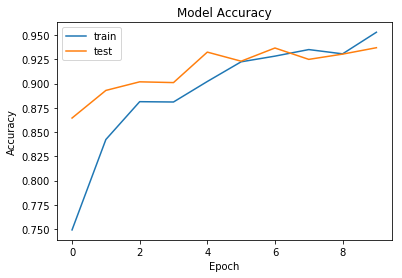

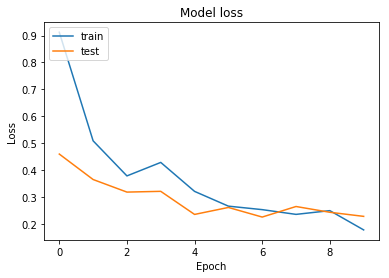

In [25]:
# Plotting the Loss and Classification Accuracy
model.metrics_names
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
